<a href="https://colab.research.google.com/github/gautambhowmick74/Deep-Reinforcement-Learning/blob/master/reinforcement_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup and Data Fetch

- Import the required dependencies.

- Import Plotly .

- Setup Quandl API and get an API key.

- Define a function to download and cache datasets from Quandl.

- Use pickle to serialize and save downloaded data as a file, avoid re-downloading the same data.

- The function will return the data as a Pandas dataframe. These are spreadsheets on steroids!

## CryptoCoin Speculator - Data Driven Exploration

- How do CryptoCoin markets behave?

- What causes sudden spikes and dips in cryptocurrency values?

- Are different altcoins, such as Litecoin and Ripple, correlated or independent?

- How to predict what will happen next?

### Outline

- Retrieve, analyze, and visualize different cryptocurrencies.

- Discover interesting trends in how these volatile markets behave.

- How are they evolving.

- Where and how to fetch the Data and explore them.

In [0]:
!pip install plotly --upgrade

     |████████████████████████████████| 7.1MB 2.8MB/s 
  Found existing installation: plotly 3.6.1
    Uninstalling plotly-3.6.1:
      Successfully uninstalled plotly-3.6.1


In [0]:
!pip install chart_studio 

     |████████████████████████████████| 81kB 3.0MB/s 


In [0]:
!pip install quandl

     |████████████████████████████████| 61kB 20.1MB/s 
     |████████████████████████████████| 61kB 20.6MB/s 
     |████████████████████████████████| 2.3MB 8.2MB/s 
     |████████████████████████████████| 102kB 26.4MB/s 
  Created wheel for inflection: filename=inflection-0.3.1-cp36-none-any.whl size=6077 sha256=bf8718bb142242f3e092511feb02be88ed173d0aff4e4215096e1b19a3ce93c1
  Stored in directory: /root/.cache/pip/wheels/9f/5a/d3/6fc3bf6516d2a3eb7e18f9f28b472110b59325f3f258fe9211
Successfully built inflection
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: more-itertools 7.2.0
    Uninstalling more-itertools-7.2.0:
      Successfully uninstalled more-itertools-7.2.0


In [0]:
!pip install chart_studio 

##	Import the required dependencies

In [0]:
import tensorflow as tf
import numpy as np
import math
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import make_pipeline
from scipy import signal
import os
import pandas as pd
import pickle
import quandl
from datetime import datetime
import requests        # for making http requests to binance
import json            # for parsing what binance sends back to us
from functools import reduce
import chart_studio.plotly as py   
py.sign_in('gautam_bhowmick','sNtJ5zmTpdMel8LiN2I7')
import plotly.graph_objs as go
quandl.ApiConfig.api_key = "J3BnsCRV4D89YiT5aXav"
import matplotlib.pyplot as plt
import sys
import time
import gym
import torch
import math
import enum
import torch.nn as nn
import gym.spaces
from gym.utils import seeding
import torch.nn.functional as F
import seaborn as sns
import matplotlib.dates as mdates
%matplotlib inline
sns.set(style='darkgrid', context='talk', palette='Dark2')

my_year_month_fmt = mdates.DateFormatter('%m/%y')

## Configure plotly

In [0]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))

configure_plotly_browser_state()

##get_qualdal_data, which will download and cache JSON data

In [0]:
def get_quandl_data(quandl_id):
    '''Download and cache Quandl dataseries'''
    
    cache_path = '{}.pkl'.format(quandl_id).replace('/','-')
    try:
        f = open(cache_path, 'rb')
        df = pickle.load(f)   
        print('Loaded {} from cache'.format(quandl_id))
    except (OSError, IOError) as e:
        print('Downloading {} from Quandl'.format(quandl_id))
        df = quandl.get(quandl_id, returns="pandas")
        df.to_pickle(cache_path)
        print('Cached {} at {}'.format(quandl_id, cache_path))
    return df

## Kraken

- Historical Bitcoin exchange rate from the Kraken Bitcoin exchange.
- Inspect the first 5 rows of the dataframe using the tail() method.
- Visually verify that the data looks correct.

### Visualize Kraken Exchange Data
- Plotly is used for visualizations. Produces fully-interactive charts using D3.js. 
- These charts have attractive visual defaults, are easy to explore, and are very simple to embed in web pages.

- Compare the generated chart with publically Bitcoin prices(e.g. Coinbase)

In [0]:
# Pull Kraken BTC price exchange data
btc_usd_price_kraken = get_quandl_data('BCHARTS/KRAKENUSD')

Cached BCHARTS/KRAKENUSD at BCHARTS-KRAKENUSD.pkl


In [0]:
btc_usd_price_kraken.tail()

Open     High  ...  Volume (Currency)  Weighted Price
Date                          ...                                   
2019-08-04  10809.9  11078.7  ...       5.407022e+07    10837.020348
2019-08-05  10977.6  11940.0  ...       9.844778e+07    11642.109710
2019-08-06  11799.6  12340.0  ...       1.293185e+08    11772.372349
2019-08-07  11458.1  12173.8  ...       1.118898e+08    11755.561080
2019-08-08  11973.3  12019.0  ...       5.562814e+07    11745.003155

[5 rows x 7 columns]

#### A copy of this chart will store in Ploty account

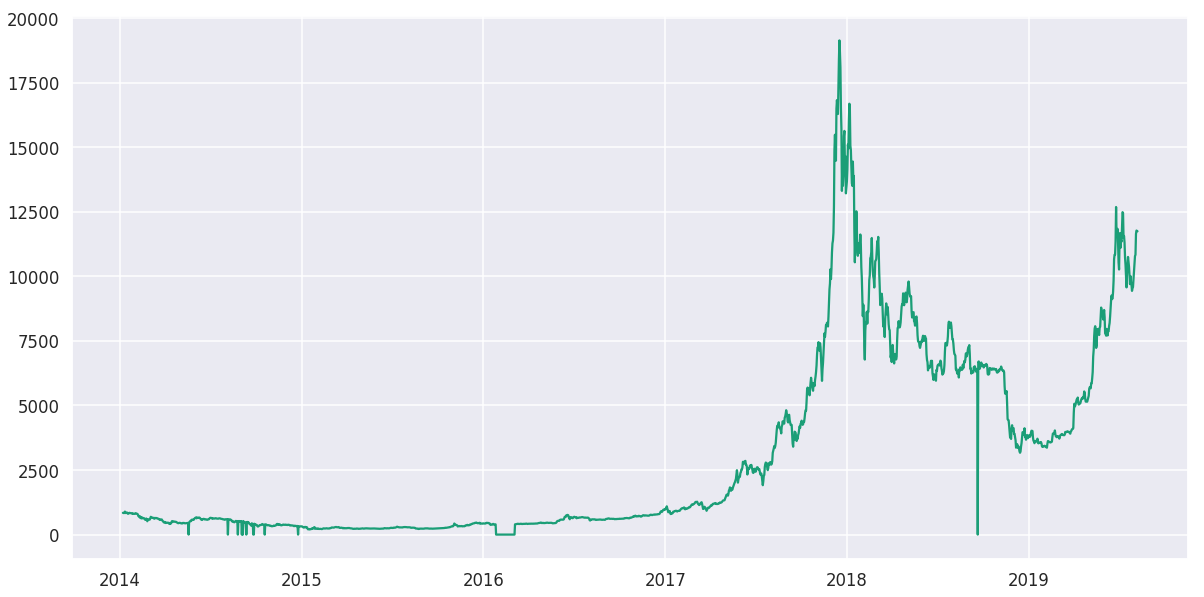

In [0]:
# NOTE: need to call configure_plotly_browser_state() in every cell that we need to plot
configure_plotly_browser_state()
# Chart the BTC pricing data
btc_trace = go.Scatter(x=btc_usd_price_kraken.index, y=btc_usd_price_kraken['Weighted Price'])
py.iplot([btc_trace])
plt.figure(figsize=(20,10))
plt.plot(btc_usd_price_kraken['Weighted Price'])
plt.show()

## Other Exchanges
-	Pull Pricing Data from various BTC Exchanges. There is a reason!
-	Kraken has a glitch in dataset - few notable down-spikes, late 2014 and early 2016.
-	Distributed nature of Bitcoin exchanges means no single exchange contains a true "master price" of Bitcoin.
-	Pull data from three major exchanges and calculate an aggregate Bitcoin price index.
-	Download the data from each exchange into a dictionary of dataframes.
-	Combine Average Price of each individual Bitcoin exchange to verify prices.
-	Preview and verify last five rows the result using the tail () method
-	Visualize the Pricing Datasets to compare.


In [0]:
# Pull pricing data for 3 more BTC exchanges
exchanges = ['COINBASE','BITSTAMP','ITBIT']

exchange_data = {}

exchange_data['KRAKEN'] = btc_usd_price_kraken

for exchange in exchanges:
    exchange_code = 'BCHARTS/{}USD'.format(exchange)
    btc_exchange_df = get_quandl_data(exchange_code)
    exchange_data[exchange] = btc_exchange_df

Cached BCHARTS/COINBASEUSD at BCHARTS-COINBASEUSD.pkl
Cached BCHARTS/BITSTAMPUSD at BCHARTS-BITSTAMPUSD.pkl
Cached BCHARTS/ITBITUSD at BCHARTS-ITBITUSD.pkl


##Visualize Coinbase Bitcoin data

In [0]:
btc_usd_price_coinbase=exchange_data['COINBASE']
btc_usd_price_coinbase.head()

Open    High  ...  Volume (Currency)  Weighted Price
Date                        ...                                   
2015-02-04  228.77  230.25  ...       7.578076e+05      226.608934
2015-05-11  241.59  245.49  ...       1.498052e+06      242.541273
2015-05-12  242.74  243.40  ...       1.531046e+06      242.155569
2015-05-13  242.04  244.13  ...       2.424123e+06      241.712609
2015-05-14  236.93  240.00  ...       2.462002e+06      237.508205

[5 rows x 7 columns]

In [0]:
btc_usd_price_coinbase.tail()

Open     High  ...  Volume (Currency)  Weighted Price
Date                          ...                                   
2019-01-03  3890.80  3893.80  ...       3.382343e+07     3826.069230
2019-01-04  3787.57  3849.00  ...       3.387391e+07     3784.747665
2019-01-05  3820.82  3874.12  ...       2.322994e+07     3834.629826
2019-01-06  3799.99  4088.00  ...       3.763788e+07     3959.269123
2019-01-07  4040.98  4070.00  ...       3.569372e+07     4021.040654

[5 rows x 7 columns]

#### A copy of this chart will store in Plotly account

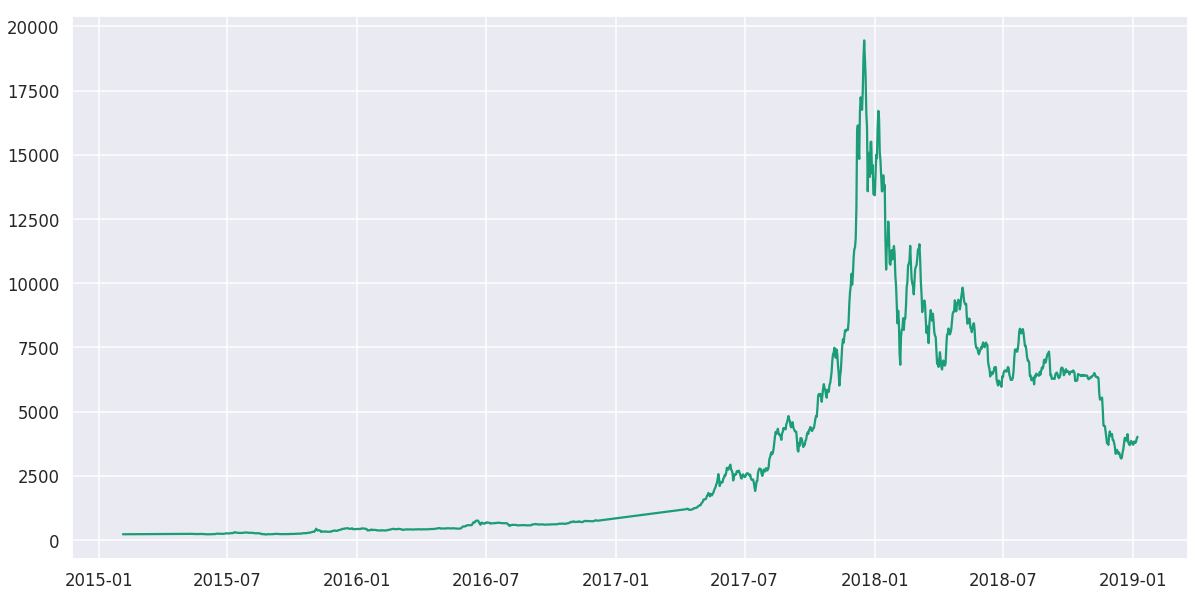

In [0]:
# NOTE: need to call configure_plotly_browser_state() in every cell that we need to plot
configure_plotly_browser_state()
# Chart the BTC pricing data
btc_trace = go.Scatter(x=btc_usd_price_coinbase.index, y=btc_usd_price_coinbase['Weighted Price'])
py.iplot([btc_trace])
plt.figure(figsize=(20,10))
plt.plot(btc_usd_price_coinbase['Weighted Price'])
plt.show()

## Visualize Bitstamp Bitcoin data

In [0]:
btc_usd_price_bitstamp=exchange_data['BITSTAMP']
btc_usd_price_bitstamp.head()

Open  High   Low  ...  Volume (BTC)  Volume (Currency)  Weighted Price
Date                          ...                                                 
2011-09-13  5.80  6.00  5.65  ...     58.371382         346.097389        5.929231
2011-09-14  5.58  5.72  5.52  ...     61.145984         341.854813        5.590798
2011-09-15  5.12  5.24  5.00  ...     80.140795         408.259002        5.094272
2011-09-16  4.82  4.87  4.80  ...     39.914007         193.763147        4.854515
2011-09-17  4.87  4.87  4.87  ...      0.300000           1.461000        4.870000

[5 rows x 7 columns]

#### A copy of this chart will store in Plotly account

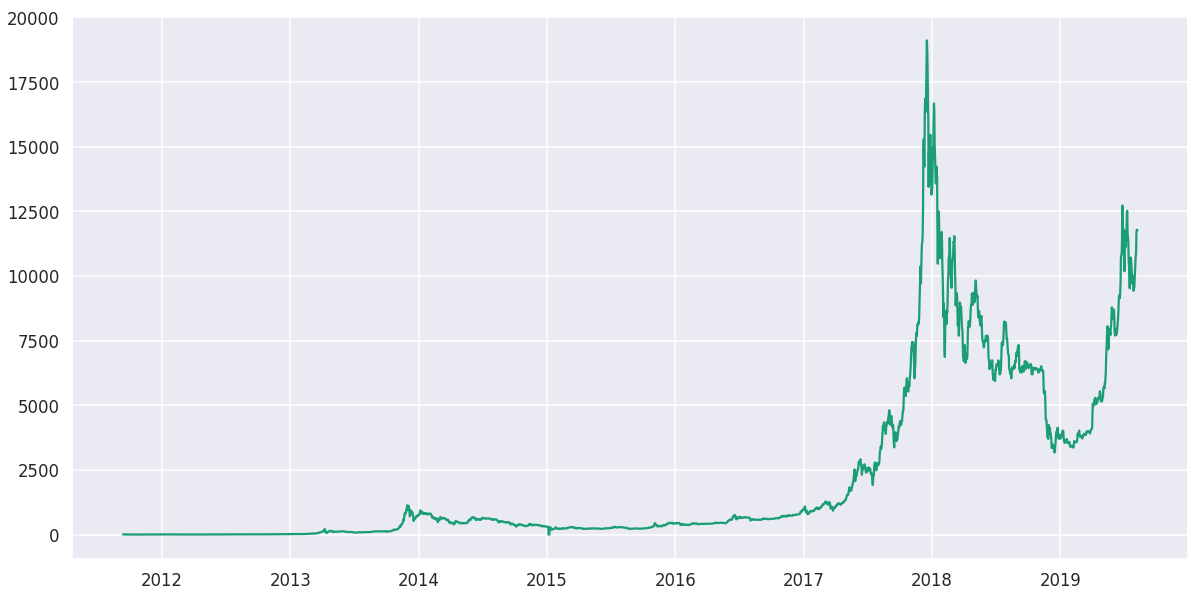

In [0]:
# NOTE: need to call configure_plotly_browser_state() in every cell that we need to plot
configure_plotly_browser_state()
# Chart the BTC pricing data
btc_trace = go.Scatter(x=btc_usd_price_bitstamp.index, y=btc_usd_price_bitstamp['Weighted Price'])
py.iplot([btc_trace])
plt.figure(figsize=(20,10))
plt.plot(btc_usd_price_bitstamp['Weighted Price'])
plt.show()

##Visualize Itbit Bitcoin data

In [0]:
btc_usd_price_itbit=exchange_data['ITBIT']
btc_usd_price_itbit.head()

Open    High  ...  Volume (Currency)  Weighted Price
Date                        ...                                   
2013-08-25  109.22  111.40  ...             220.62          110.31
2013-08-26  105.83  105.83  ...             105.83          105.83
2013-08-27    0.00    0.00  ...               0.00            0.00
2013-08-28    0.00    0.00  ...               0.00            0.00
2013-08-29    0.00    0.00  ...               0.00            0.00

[5 rows x 7 columns]

### A copy of this chart will store in Plotly account

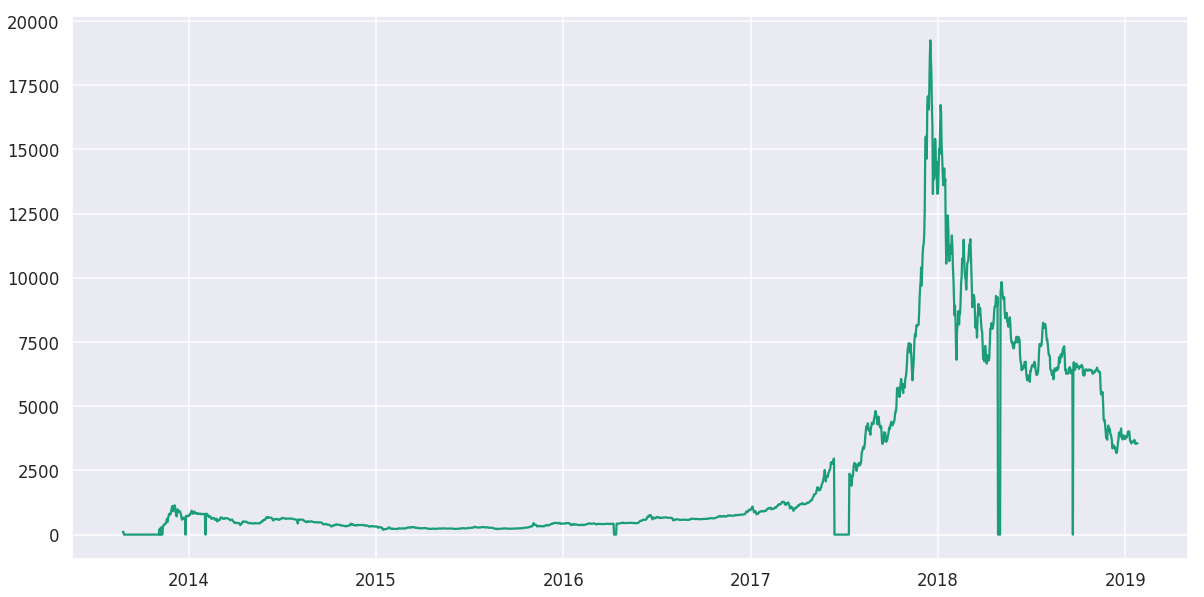

In [0]:
# NOTE: need to call configure_plotly_browser_state() in every cell that we need to plot
configure_plotly_browser_state()
# Chart the BTC pricing data
btc_trace = go.Scatter(x=btc_usd_price_itbit.index, y=btc_usd_price_itbit['Weighted Price'])
py.iplot([btc_trace])
plt.figure(figsize=(20,10))
plt.plot(btc_usd_price_itbit['Weighted Price'])
plt.show()

## Merge Bitcoin prices across Exchanges

- Combine Price of each individual Bitcoin exchange to verify prices.


In [0]:
def merge_dfs_on_column(dataframes, labels, col):
    '''Merge a single column of each dataframe into a new combined dataframe'''
    series_dict = {}
    for index in range(len(dataframes)):
        series_dict[labels[index]] = dataframes[index][col]
        
    return pd.DataFrame(series_dict)

In [0]:
# Merge the Open dataseries' into a single dataframe
btc_open_datasets = merge_dfs_on_column(list(exchange_data.values()), list(exchange_data.keys()), 'Open').fillna(value=0.00)
# Merge the High dataseries' into a single dataframe
btc_high_datasets = merge_dfs_on_column(list(exchange_data.values()), list(exchange_data.keys()), 'High').fillna(value=0.00)
# Merge the Low dataseries' into a single dataframe
btc_low_datasets = merge_dfs_on_column(list(exchange_data.values()), list(exchange_data.keys()), 'Low').fillna(value=0.00)
# Merge the Close dataseries' into a single dataframe
btc_close_datasets = merge_dfs_on_column(list(exchange_data.values()), list(exchange_data.keys()), 'Close').fillna(value=0.00)
# Merge the Volume (Currency) dataseries' into a single dataframe
btc_volume_datasets = merge_dfs_on_column(list(exchange_data.values()), list(exchange_data.keys()), 'Volume (Currency)').fillna(value=0.00)
# Merge the BTC price dataseries' into a single dataframe
btc_usd_datasets = merge_dfs_on_column(list(exchange_data.values()), list(exchange_data.keys()), 'Weighted Price').fillna(value=0.00)

### Verify Bitcoin -Weighted Price- all Exchanges

In [0]:
btc_usd_datasets.tail()

KRAKEN  COINBASE      BITSTAMP  ITBIT
Date                                                   
2019-08-04  10837.020348       0.0  10842.512156    0.0
2019-08-05  11642.109710       0.0  11665.608255    0.0
2019-08-06  11772.372349       0.0  11786.889652    0.0
2019-08-07  11755.561080       0.0  11767.586774    0.0
2019-08-08  11745.003155       0.0  11779.574989    0.0

The prices look to be as expected: they are in similar ranges, but with slight variations based on the supply and demand of each individual Bitcoin exchange.

## Helper method to Visualize pricing data

- View how these pricing datasets compare. 
- Define a helper function to provide a single-line command to generate a graph from the dataframe.

In [0]:
def df_scatter(df, title, seperate_y_axis=False, x_axis_label='',y_axis_label='', scale='linear', initial_hide=False):
    '''Generate a scatter plot of the entire dataframe'''
    label_arr = list(df)
    series_arr = list(map(lambda col: df[col], label_arr))
    
    layout = go.Layout(
        title=title,
        legend=dict(orientation="h"),
        xaxis=dict(type='date'),
        yaxis=dict(
            title=y_axis_label,
            showticklabels= not seperate_y_axis,
            type=scale
        )
    )
    
    y_axis_config = dict(
        overlaying='y',
        showticklabels=False,
        type=scale )
    
    visibility = 'visible'
    if initial_hide:
        visibility = 'legendonly'
        
    # Form Trace For Each Series
    trace_arr = []
    for index, series in enumerate(series_arr):
        trace = go.Scatter(
            x=series.index, 
            y=series, 
            name=label_arr[index]  #,  visible=visibility
        )
        
        # Add seperate axis for the series
        if seperate_y_axis:
            trace['yaxis'] = 'y{}'.format(index + 1)
            layout['yaxis{}'.format(index + 1)] = y_axis_config    
        trace_arr.append(trace)

    fig = go.Figure(data=trace_arr, layout=layout)
    py.plot(fig)

 ### Visualize Bitcoin -Weighted Price- across Exchanges
- A copy of this chart will store in Plotly account.

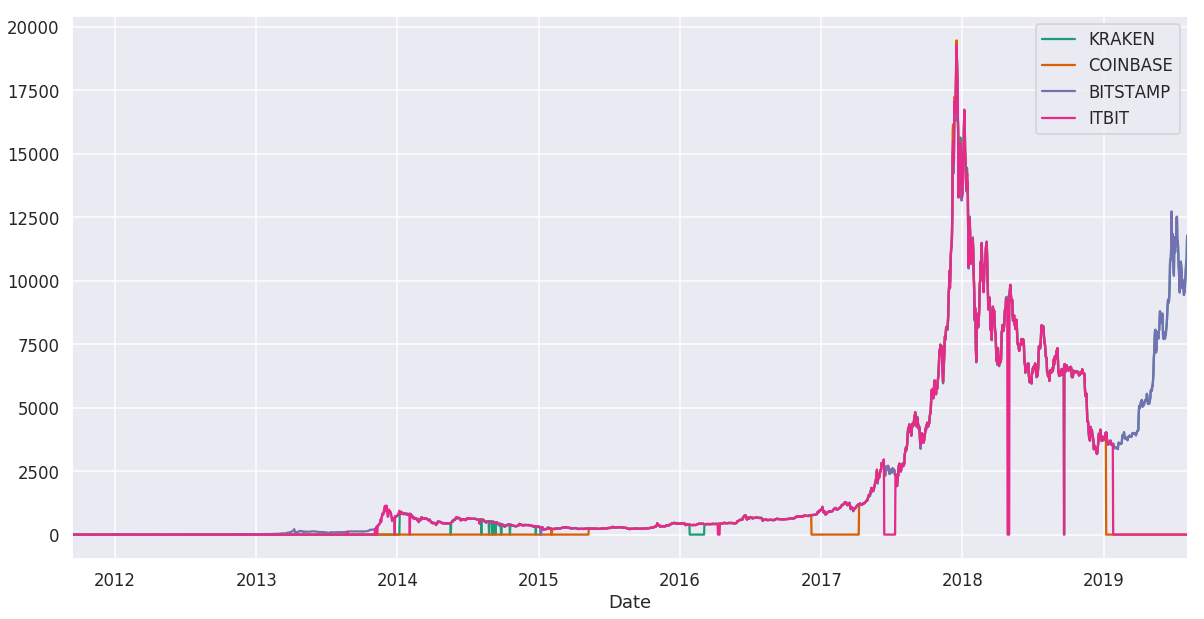

In [0]:
# NOTE: need to call configure_plotly_browser_state() in every cell that we need to plot
configure_plotly_browser_state()
# Plot all of the BTC exchange prices
df_scatter(btc_usd_datasets,'Bitcoin Price (USD) By Exchange',False,'Year','USD','linear',False)
btc_usd_datasets.plot(figsize=(20,10))
plt.legend()
plt.show()

## Compute average of Bitcoin pricing data
-	Calculate average of open, high, low, close and volume.
-	A new column, containing the daily average Bitcoin prices.
-	Merge All of The Pricing Data into A Single Dataframe.
-	Create a new Colum 'ticker' to identify currency Symbol


In [0]:
# Calculate the average Open price as a new column
btc_open_datasets['open'] = btc_open_datasets.mean(axis=1)
# Calculate the average High price as a new column
btc_high_datasets['high'] = btc_high_datasets.mean(axis=1)
# Calculate the average Low price as a new column
btc_low_datasets['low'] = btc_low_datasets.mean(axis=1)
# Calculate the average Close price as a new column
btc_close_datasets['close'] = btc_close_datasets.mean(axis=1)
# Calculate the average Volume price as a new column
btc_volume_datasets['volume'] = btc_volume_datasets.mean(axis=1)
# Calculate the average BTC price as a new column
btc_usd_datasets['AVGPRICEUSD'] = btc_usd_datasets.mean(axis=1)
data_frames = [btc_open_datasets[['open']],btc_high_datasets[['high']],btc_low_datasets[['low']],btc_close_datasets[['close']],
               btc_volume_datasets[['volume']],btc_usd_datasets[['AVGPRICEUSD']]]
combined_btc_df = reduce(lambda  left,right: pd.merge(left,right,on=['Date'], how='outer'), data_frames).fillna(value=0.00)

In [0]:
# inserting column with static value in data frame 
combined_btc_df.insert(0, "ticker", "BTC") 
combined_btc_df.tail()

ticker       open       high  ...      close        volume  AVGPRICEUSD
Date                                     ...                                      
2019-08-04    BTC  5405.6200  5541.1725  ...  5489.8400  3.399995e+07  5419.883126
2019-08-05    BTC  5491.0375  5974.8400  ...  5899.9000  7.495037e+07  5826.929491
2019-08-06    BTC  5899.9000  6166.2500  ...  5732.2000  8.071652e+07  5889.815500
2019-08-07    BTC  5732.4200  6079.8050  ...  5983.5675  7.351435e+07  5880.786964
2019-08-08    BTC  5986.6900  6012.5775  ...  5923.9200  4.120672e+07  5881.144536

[5 rows x 7 columns]

#### A copy of this chart will store in Plotly account

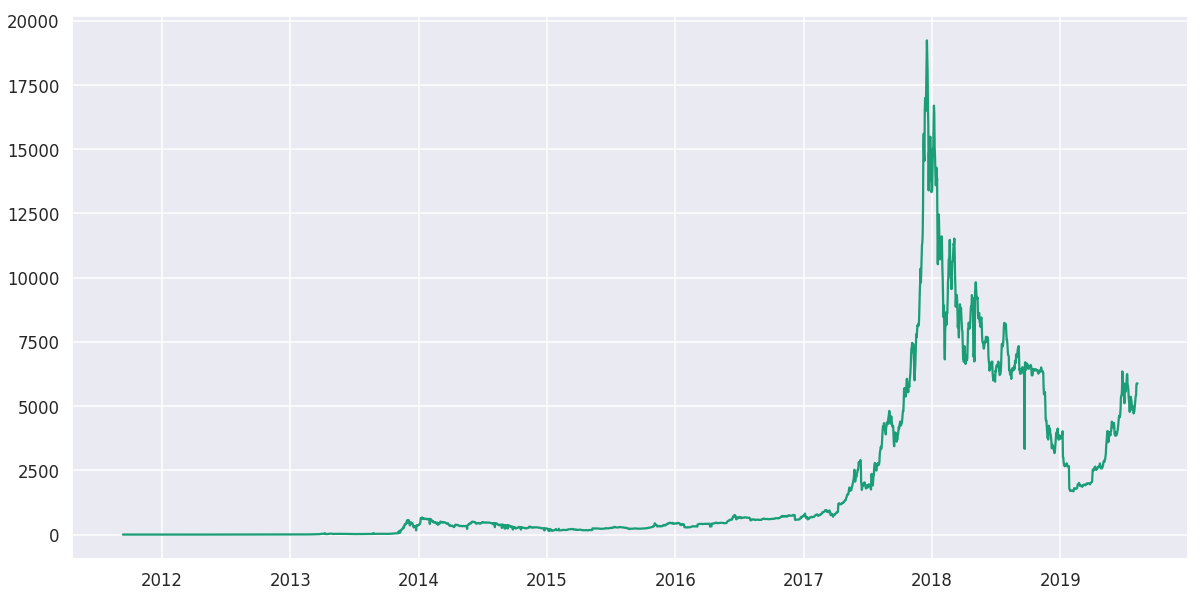

In [0]:
# NOTE: need to call configure_plotly_browser_state() in every cell that we need to plot
configure_plotly_browser_state()
# Plot the average BTC price
btc_trace = go.Scatter(x=combined_btc_df.index, y=combined_btc_df['AVGPRICEUSD'])
py.iplot([btc_trace])
plt.figure(figsize=(20,10))
plt.plot(combined_btc_df['AVGPRICEUSD'])
plt.show()

## Altcoins - Download and Visualization

- Retrieve Altcoin Pricing Data
- The non-Bitcoin cryptocurrencies are commonly referred to as altcoins.

- Define Poloniex API Helper Functions
- Define two helper functions to download and cache JSON data from this API. 
- get_json_data, which will download and cache JSON data from a provided URL.
- Format Poloniex API HTTP requests and call  get_json_data function to save the resulting data.

- Download Trading Data From Poloniex
- * Most altcoins cannot be bought directly with USD; to acquire these coins individuals often buy Bitcoins and then trade the Bitcoins for altcoins on cryptocurrency exchanges. *

- Download the exchange rate to BTC for each coin, and then use existing BTC pricing to convert this value to USD.

- We'll download exchange data for five of the top cryptocurrencies 
-- Ethereum
-- Litecoin
-- Ripple
-- Dash
-- Monero


- Now we have a dictionary of 5 dataframes, each containing the historical daily average exchange prices between the altcoin and Bitcoin. We can preview the last few rows of the Ethereum price table to make sure it looks ok.

In [0]:
def get_json_data(json_url, cache_path):
    '''Download and cache JSON data, return as a dataframe.'''
    try:        
        f = open(cache_path, 'rb')
        df = pickle.load(f)   
        print('Loaded {} from cache'.format(json_url))
    except (OSError, IOError) as e:
        print('Downloading {}'.format(json_url))
        df = pd.read_json(json_url)
        df.to_pickle(cache_path)
        print('Cached response at {}'.format(json_url, cache_path))
    return df

In [0]:
base_polo_url = 'https://poloniex.com/public?command=returnChartData&currencyPair={}&start={}&end={}&period={}'
start_date = datetime.strptime('2011-01-01', '%Y-%m-%d') # get data from the start of 2011
end_date = datetime.now() # up until today
pediod = 86400 # pull daily data (86,400 seconds per day)

def get_crypto_data(poloniex_pair):
    '''Retrieve cryptocurrency data from poloniex'''
    json_url = base_polo_url.format(poloniex_pair, start_date.timestamp(), end_date.timestamp(), pediod)
    data_df = get_json_data(json_url, poloniex_pair)
    data_df = data_df.set_index('date')
    return data_df

### We'll download exchange data for five of the top cryptocurrencies

In [0]:
altcoins = ['ETH','LTC','XRP','DASH','XMR']

altcoin_data = {}
for altcoin in altcoins:
    coinpair = 'BTC_{}'.format(altcoin)
    crypto_price_df = get_crypto_data(coinpair)
    altcoin_data[altcoin] = crypto_price_df

Cached response at https://poloniex.com/public?command=returnChartData&currencyPair=BTC_ETH&start=1293840000.0&end=1565378254.227742&period=86400
Cached response at https://poloniex.com/public?command=returnChartData&currencyPair=BTC_LTC&start=1293840000.0&end=1565378254.227742&period=86400
Cached response at https://poloniex.com/public?command=returnChartData&currencyPair=BTC_XRP&start=1293840000.0&end=1565378254.227742&period=86400
Cached response at https://poloniex.com/public?command=returnChartData&currencyPair=BTC_DASH&start=1293840000.0&end=1565378254.227742&period=86400
Cached response at https://poloniex.com/public?command=returnChartData&currencyPair=BTC_XMR&start=1293840000.0&end=1565378254.227742&period=86400


###  5 Altcoins
- Dictionary with 5 dataframes, each containing the historical daily average exchange prices between the altcoin and Bitcoin.

- Preview the last few rows of the Ethereum price table to visually verify

In [0]:
altcoin_data['ETH'].tail()

close      high  ...      volume  weightedAverage
date                            ...                             
2019-08-05  0.019752  0.020351  ...  287.213371         0.019760
2019-08-06  0.019710  0.019915  ...  195.840991         0.019381
2019-08-07  0.018878  0.019730  ...  122.790598         0.019160
2019-08-08  0.018418  0.019077  ...  102.482688         0.018727
2019-08-09  0.017599  0.018527  ...  134.518189         0.018037

[5 rows x 7 columns]

## Convert Altcoin Prices to USD
- Since we now have the exchange rate for each cryptocurrency to Bitcoin, and we have the Bitcoin/USD historical pricing index, we can directly calculate the USD price series for each altcoin.
- Here, we've created a new column in each altcoin dataframe with the USD prices for that coin.
- Next, we can re-use our merge_dfs_on_column function from earlier to create a combined dataframe of the USD price for each cryptocurrency.
- Now let's also add the Bitcoin prices as a final column to the combined dataframe.

### Calculate USD Price as a new column in each altcoin dataframe

In [0]:
for altcoin in altcoin_data.keys():
    altcoin_data[altcoin]['AVGPRICEUSD'] =  altcoin_data[altcoin]['weightedAverage'] * combined_btc_df['AVGPRICEUSD']

In [0]:
altcoin_data['ETH'].head()

close       high  ...  weightedAverage  AVGPRICEUSD
date                             ...                              
2015-08-08  0.003125  50.000000  ...         0.004530     1.224162
2015-08-09  0.002581   0.004100  ...         0.002860     0.755301
2015-08-10  0.002645   0.002902  ...         0.002524     0.669491
2015-08-11  0.003950   0.004400  ...         0.003286     0.874050
2015-08-12  0.004500   0.004882  ...         0.004196     1.127745

[5 rows x 8 columns]

### Merge USD price of each altcoin into single dataframe 

In [0]:
combined_avgpriceusd_alt_df = merge_dfs_on_column(list(altcoin_data.values()), list(altcoin_data.keys()), 'AVGPRICEUSD')

### Add BTC price to the dataframe

In [0]:
combined_avgpriceusd_alt_df['BTC'] = combined_btc_df['AVGPRICEUSD']
combined_avgpriceusd_alt_df=combined_avgpriceusd_alt_df.fillna(value=0.00)

In [0]:
combined_avgpriceusd_alt_df.tail()

ETH        LTC       XRP       DASH        XMR          BTC
date                                                                          
2019-08-05  115.139486  49.431067  0.161348  54.177508  46.026275  5826.929491
2019-08-06  114.151044  47.359417  0.157906  53.466744  46.397669  5889.815500
2019-08-07  112.675467  45.632849  0.153724  53.711697  46.838351  5880.786964
2019-08-08  110.136605  44.927827  0.152792  52.468337  46.985875  5881.144536
2019-08-09    0.000000   0.000000  0.000000   0.000000   0.000000     0.000000

###Function for reducing memory usage of a pandas dataframe

In [0]:
def reduce_mem_usage(props):
    start_mem_usg = props.memory_usage().sum() / 1024**2 
    print("Memory usage of dataframe is :",start_mem_usg," MB")
    NAlist = [] # Keeps track of columns that have missing values filled in. 
    for col in props.columns:
        if props[col].dtype != object:  # Exclude strings
            
            # Print current column type
            print("******************************")
            print("Column: ",col)
            print("dtype before: ",props[col].dtype)
            
            # make variables for Int, max and min
            IsInt = False
            mx = props[col].max()
            mn = props[col].min()
            
            # Integer does not support NA, therefore, NA needs to be filled
            if not np.isfinite(props[col]).all(): 
                NAlist.append(col)
                props[col].fillna(mn-1,inplace=True)  
                   
            # test if column can be converted to an integer
            asint = props[col].fillna(0).astype(np.int64)
            result = (props[col] - asint)
            result = result.sum()
            if result > -0.01 and result < 0.01:
                IsInt = True

            
            # Make Integer/unsigned Integer datatypes
            if IsInt:
                if mn >= 0:
                    if mx < 255:
                        props[col] = props[col].astype(np.uint8)
                    elif mx < 65535:
                        props[col] = props[col].astype(np.uint16)
                    elif mx < 4294967295:
                        props[col] = props[col].astype(np.uint32)
                    else:
                        props[col] = props[col].astype(np.uint64)
                else:
                    if mn > np.iinfo(np.int8).min and mx < np.iinfo(np.int8).max:
                        props[col] = props[col].astype(np.int8)
                    elif mn > np.iinfo(np.int16).min and mx < np.iinfo(np.int16).max:
                        props[col] = props[col].astype(np.int16)
                    elif mn > np.iinfo(np.int32).min and mx < np.iinfo(np.int32).max:
                        props[col] = props[col].astype(np.int32)
                    elif mn > np.iinfo(np.int64).min and mx < np.iinfo(np.int64).max:
                        props[col] = props[col].astype(np.int64)    
            
            # Make float datatypes 32 bit
            else:
                props[col] = props[col].astype(np.float32)
            
            # Print new column type
            print("dtype after: ",props[col].dtype)
            print("******************************")
    
    # Print final result
    print("___MEMORY USAGE AFTER COMPLETION:___")
    mem_usg = props.memory_usage().sum() / 1024**2 
    print("Memory usage is: ",mem_usg," MB")
    print("This is ",100*mem_usg/start_mem_usg,"% of the initial size")
    return props, NAlist

In [0]:
combined_avgpriceusd_alt_df, NAlist = reduce_mem_usage(combined_avgpriceusd_alt_df)

Memory usage of dataframe is : 0.1084136962890625  MB
******************************
Column:  ETH
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  LTC
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  XRP
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  DASH
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  XMR
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  BTC
dtype before:  float64
dtype after:  float32
******************************
___MEMORY USAGE AFTER COMPLETION:___
Memory usage is:  0.06195068359375  MB
This is  57.142857142857146 % of the initial size


### Visualize Bitcoin and Altcoins data together
- A copy of this chart will store in Plotly account

In [0]:
# NOTE: need to call configure_plotly_browser_state() in every cell that we need to plot
configure_plotly_browser_state()
# Chart all of the altocoin prices
df_scatter(combined_avgpriceusd_alt_df, 'Cryptocurrency Prices (USD)', seperate_y_axis=False, y_axis_label='Coin Value (USD)', scale='log')

## Compute Correlation Values of The Cryptocurrencies
- Despite their wildly different values and volatility, seem to be slightly correlated. 

- Especially since the spike in April 2017, even many of the smaller fluctuations appear to be occurring in sync across the entire market.

- Computes a Pearson correlation coefficient for each column in the dataframe against each other column.

- Computing correlations directly on a non-stationary time series (such as raw pricing data) can give biased correlation values. We will work around this by using the pct_change() method, which will convert each cell in the dataframe from an absolute price value to a daily return percentage.



### Calculate the pearson correlation coefficients for altcoins in 2016

- Calculate correlations for 2016.

- These correlation coefficients are all over the place. Coefficients close to 1 or -1 mean that the series' are strongly correlated or inversely correlated respectively, and coefficients close to zero mean that the values tend to fluctuate independently of each other.

- Here, the dark yellow values represent strong correlations (note that each currency is, obviously, strongly correlated with itself), and the dark blue values represent strong inverse correlations. All of the light  colors in-between represent varying degrees of weak/non-existent correlations.

- What does this chart tell us? Essentially, it shows that there was very little statistically significant linkage between how the prices of different cryptocurrencies fluctuated during 2016.


In [0]:
combined_df_2016 = combined_avgpriceusd_alt_df[combined_avgpriceusd_alt_df.index.year == 2016]
combined_df_2016.pct_change().corr(method='pearson')

ETH       LTC       XRP      DASH       XMR       BTC
ETH   1.000000  0.405814  0.382104  0.466996  0.323052  0.468396
LTC   0.405814  1.000000  0.467954  0.543109  0.436735  0.910912
XRP   0.382104  0.467954  1.000000  0.455206  0.288466  0.503339
DASH  0.466996  0.543109  0.455206  1.000000  0.400458  0.584253
XMR   0.323052  0.436735  0.288466  0.400458  1.000000  0.450863
BTC   0.468396  0.910912  0.503339  0.584253  0.450863  1.000000

### A helper method to generate Correlation heatmap

In [0]:
def correlation_heatmap(df, title, absolute_bounds=True):
    '''Plot a correlation heatmap for the entire dataframe'''
    heatmap = go.Heatmap(
        z=df.corr(method='pearson').values,
        x=df.columns,
        y=df.columns,
        colorscale='Cividis',
        colorbar=dict(title='Pearson Coefficient'),
    )
    
    layout = go.Layout(title=title)
    
    if absolute_bounds:
        heatmap['zmax'] = 1.0
        heatmap['zmin'] = -1.0
        
    fig = go.Figure(data=[heatmap], layout=layout)
    py.iplot(fig)

#### A copy of this chart will store in plotly account.

In [0]:
# NOTE: need to call configure_plotly_browser_state() in every cell that we need to plot
configure_plotly_browser_state()
correlation_heatmap(combined_df_2016.pct_change(), "Cryptocurrency Correlations in 2016")

### Calculate the pearson correlation coefficients for altcoins in 2017

In [0]:
combined_df_2017 = combined_avgpriceusd_alt_df[combined_avgpriceusd_alt_df.index.year == 2017]
combined_df_2017.pct_change().corr(method='pearson')

ETH       LTC       XRP      DASH       XMR       BTC
ETH   1.000000  0.510320  0.294375  0.587935  0.632141  0.544067
LTC   0.510320  1.000000  0.379068  0.422068  0.508928  0.507069
XRP   0.294375  0.379068  1.000000  0.182599  0.306323  0.250615
DASH  0.587935  0.422068  0.182599  1.000000  0.580199  0.455414
XMR   0.632141  0.508928  0.306323  0.580199  1.000000  0.543759
BTC   0.544067  0.507069  0.250615  0.455414  0.543759  1.000000

#### Explanations

- The most immediate explanation that comes to mind is that hedge funds have recently begun publicly trading in crypto currency markets12. 
-	These funds have vastly more capital to play with than the average trader, so if a fund is hedging their bets across multiple cryptocurrencies, and using similar trading strategies for each based on independent variables (say, the stock market), it could make sense that this trend would emerge.
-	In-Depth - XRP, for instance, one noticeable trait of the above chart is that XRP (the token for Ripple), is the least correlated cryptocurrency.
- What is interesting here is that Ripple are on fintech platforms aimed at reducing the friction of international money transfers between banks.
-	It is conceivable that some big-money players and hedge funds might be using similar trading strategies for their investments in Ripple, due to the blockchain services that use each token.


#### A copy of this chart will store in plotly account.

In [0]:
# NOTE: need to call configure_plotly_browser_state() in every cell that we need to plot
configure_plotly_browser_state()
correlation_heatmap(combined_df_2017.pct_change(), "Cryptocurrency Correlations in 2017")

### Calculate the pearson correlation coefficients for altcoins in 2018

In [0]:
combined_df_2018 = combined_avgpriceusd_alt_df[combined_avgpriceusd_alt_df.index.year == 2018]
combined_df_2018.pct_change().corr(method='pearson')

ETH       LTC       XRP      DASH       XMR       BTC
ETH   1.000000  0.931315  0.867417  0.918435  0.927007  0.936102
LTC   0.931315  1.000000  0.859827  0.918908  0.921770  0.945430
XRP   0.867417  0.859827  1.000000  0.849093  0.855065  0.860683
DASH  0.918435  0.918908  0.849093  1.000000  0.923260  0.916703
XMR   0.927007  0.921770  0.855065  0.923260  1.000000  0.939477
BTC   0.936102  0.945430  0.860683  0.916703  0.939477  1.000000

#### A copy of this chart will store in plotly account.

In [0]:
# NOTE: need to call configure_plotly_browser_state() in every cell that we need to plot
configure_plotly_browser_state()
correlation_heatmap(combined_df_2018.pct_change(), "Cryptocurrency Correlations in 2018")

### Calculate the pearson correlation coefficients for altcoins in 2019

In [0]:
combined_df_2019 = combined_avgpriceusd_alt_df[combined_avgpriceusd_alt_df.index.year == 2019]
combined_df_2019.pct_change().corr(method='pearson')

ETH       LTC       XRP      DASH       XMR       BTC
ETH   1.000000  0.930426  0.951140  0.956320  0.957752  0.958604
LTC   0.930426  1.000000  0.908172  0.909350  0.920002  0.913427
XRP   0.951140  0.908172  1.000000  0.941974  0.946631  0.942464
DASH  0.956320  0.909350  0.941974  1.000000  0.959350  0.950225
XMR   0.957752  0.920002  0.946631  0.959350  1.000000  0.955403
BTC   0.958604  0.913427  0.942464  0.950225  0.955403  1.000000

#### A copy of this chart will store in plotly account.

In [0]:
# NOTE: need to call configure_plotly_browser_state() in every cell that we need to plot
configure_plotly_browser_state()
correlation_heatmap(combined_df_2019.pct_change(), "Cryptocurrency Correlations in 2019")

##Convert Altconis Dictionary to Panda data frame

In [0]:
combine_altcoin_data = pd.DataFrame()
for key in altcoin_data.keys():
    altcoin_df=pd.DataFrame(altcoin_data[key], columns=['open', 'high','low','close','volume','AVGPRICEUSD'])
    altcoin_df.insert(0,'ticker',key)
    altcoin_df=altcoin_df.fillna(value=0.00)
    combine_altcoin_data=combine_altcoin_data.append(altcoin_df)

In [0]:
combine_altcoin_data.head()

ticker       open       high  ...     close       volume  AVGPRICEUSD
date                                     ...                                    
2015-08-08    ETH  50.000000  50.000000  ...  0.003125  1205.803321     1.224162
2015-08-09    ETH   0.003000   0.004100  ...  0.002581   898.123434     0.755301
2015-08-10    ETH   0.002650   0.002902  ...  0.002645   718.365266     0.669491
2015-08-11    ETH   0.002650   0.004400  ...  0.003950  3007.274111     0.874050
2015-08-12    ETH   0.003955   0.004882  ...  0.004500  4690.075032     1.127745

[5 rows x 7 columns]

In [0]:
combine_altcoin_data.tail()

ticker      open      high  ...     close     volume  AVGPRICEUSD
date                                   ...                                  
2019-08-05    XMR  0.008015  0.008142  ...  0.007912  42.112172    46.026275
2019-08-06    XMR  0.007912  0.008080  ...  0.007816  40.848309    46.397669
2019-08-07    XMR  0.007811  0.008145  ...  0.008130  32.999498    46.838351
2019-08-08    XMR  0.008130  0.008146  ...  0.007960  47.200758    46.985875
2019-08-09    XMR  0.007966  0.008000  ...  0.007828  26.847339     0.000000

[5 rows x 7 columns]

## Combine Bitcoin and Altcoins data frame

#### Since we observed a spike on Cryptocurrencies values from 2016, hence we will analyze data from 2016

In [0]:
combined_btc_df=combined_btc_df[combined_btc_df.index.year.isin(['2016','2017','2018','2019'])]
combine_altcoin_data=combine_altcoin_data[combine_altcoin_data.index.year.isin(['2016','2017','2018','2019'])]
currency_frames=[combined_btc_df,combine_altcoin_data]
combine_df=pd.concat(currency_frames,sort=False)
combine_df.index.name = 'begins_at'
combine_df_rl=combine_df


In [0]:
combine_df.head()

ticker        open  ...        volume  AVGPRICEUSD
begins_at                      ...                           
2016-01-01    BTC  431.347248  ...  9.472697e+05   432.873928
2016-01-02    BTC  434.707500  ...  7.156164e+05   433.695193
2016-01-03    BTC  434.022500  ...  1.039288e+06   429.011100
2016-01-04    BTC  430.432502  ...  1.458225e+06   432.395792
2016-01-05    BTC  432.750002  ...  1.123121e+06   432.149107

[5 rows x 7 columns]

### You can then use the close DataFrame to start making some interesting plots

In [0]:
close=pd.DataFrame(combine_df['close'].groupby([combine_df['ticker'],combine_df.index]).mean())

### Distribution plot for daily percentage change

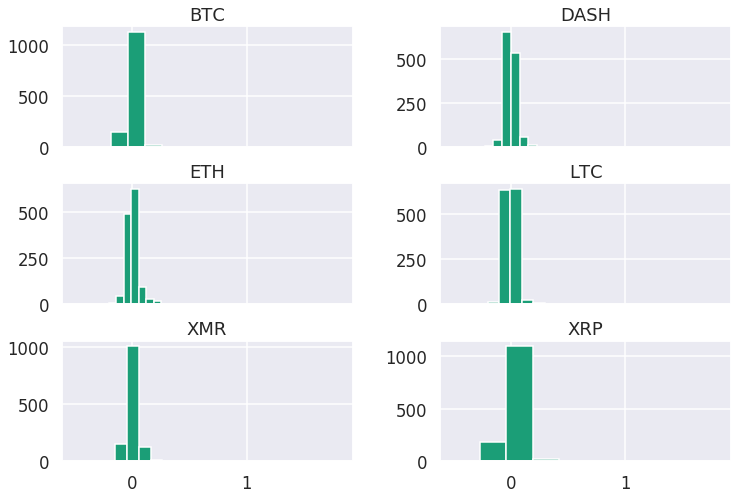

In [0]:
daily_close_px = close[['close']].reset_index().pivot('begins_at', 'ticker', 'close')

# Calculate the daily percentage change for `daily_close_px`
daily_pct_change = daily_close_px.pct_change()

# Plot the distributions
daily_pct_change.hist(bins=10, sharex=True, figsize=(12,8))

# Show the resulting plot
plt.show()

### Plot a scatter matrix

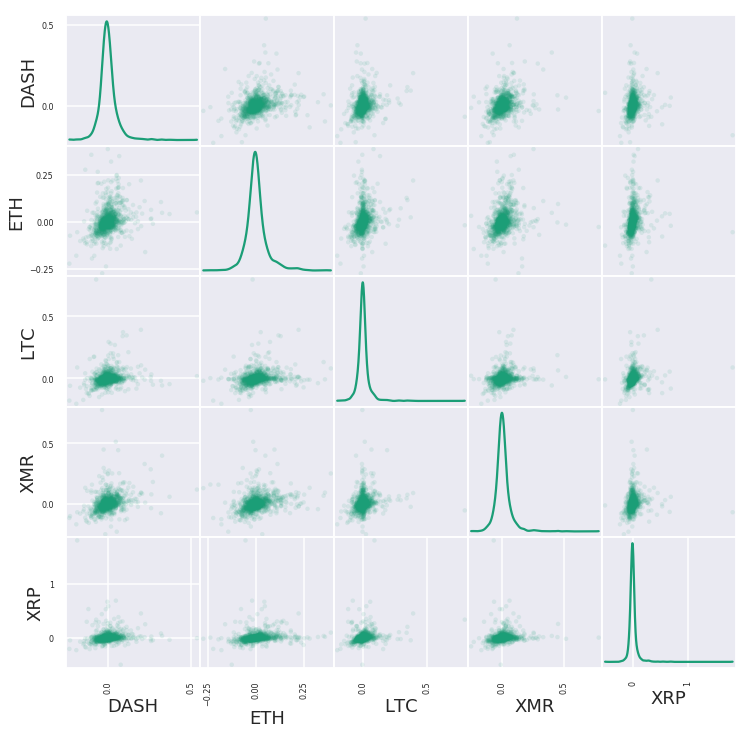

In [0]:
# Plot a scatter matrix with the `daily_pct_change` data 
pd.plotting.scatter_matrix(daily_pct_change, diagonal='kde', alpha=0.1,figsize=(12,12))

# Show the plot
plt.show()

### Volatility Calculation

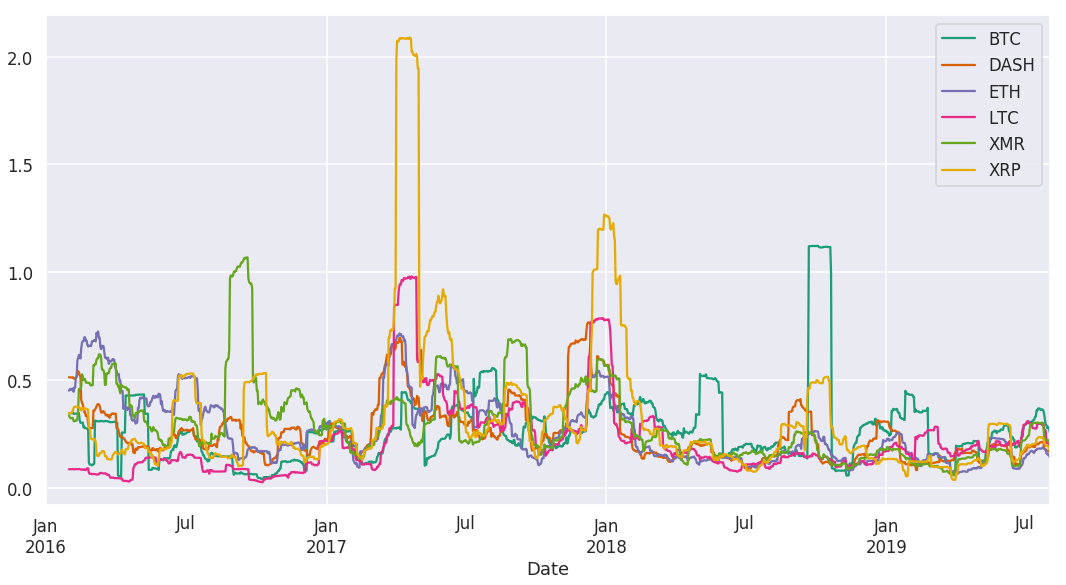

In [0]:
# Define the minumum of periods to consider 
min_periods = 30 

# Calculate the volatility
vol = daily_pct_change.rolling(min_periods).std() * np.sqrt(min_periods) 

# Plot the volatility
vol.plot(figsize=(18, 9))
plt.xlabel('Date')
plt.legend() 
# Show the plot
plt.show()

In [0]:
vol.tail()

ticker           BTC      DASH       ETH       LTC       XMR       XRP
begins_at                                                             
2019-07-30  0.275824  0.171073  0.157174  0.205615  0.221445  0.193594
2019-07-31  0.280595  0.170348  0.152406  0.209138  0.221270  0.190833
2019-08-01  0.281377  0.172046  0.153314  0.205000  0.216447  0.191088
2019-08-02  0.259910  0.165022  0.142332  0.198313  0.207915  0.176791
2019-08-03  0.250822  0.151970  0.141790  0.190400  0.202906  0.174450

## Moving Average

- Average closing price based on date and currency type

In [0]:
close = close.reset_index(1)

In [0]:
close = close.reset_index(0)


In [0]:
close.head()

ticker  begins_at       close
0    BTC 2016-01-01  433.658828
1    BTC 2016-01-02  434.440000
2    BTC 2016-01-03  429.875002
3    BTC 2016-01-04  433.008538
4    BTC 2016-01-05  432.350000

In [0]:
close=close.pivot(index='begins_at', columns='ticker', values='close')

In [0]:
close.head()

ticker             BTC     DASH       ETH       LTC       XMR       XRP
begins_at                                                              
2016-01-01  433.658828  0.00789  0.002177  0.008100  0.001141  0.000014
2016-01-02  434.440000  0.00775  0.002150  0.008059  0.001217  0.000014
2016-01-03  429.875002  0.00758  0.002244  0.008074  0.001146  0.000014
2016-01-04  433.008538  0.00777  0.002181  0.008078  0.001151  0.000014
2016-01-05  432.350000  0.00768  0.002200  0.008010  0.001156  0.000014

### Let us plot the last 4 years for these three timeseries for BITCOIN stock, to get a feeling about how these behave.

- Simple Moving Average (SMA)

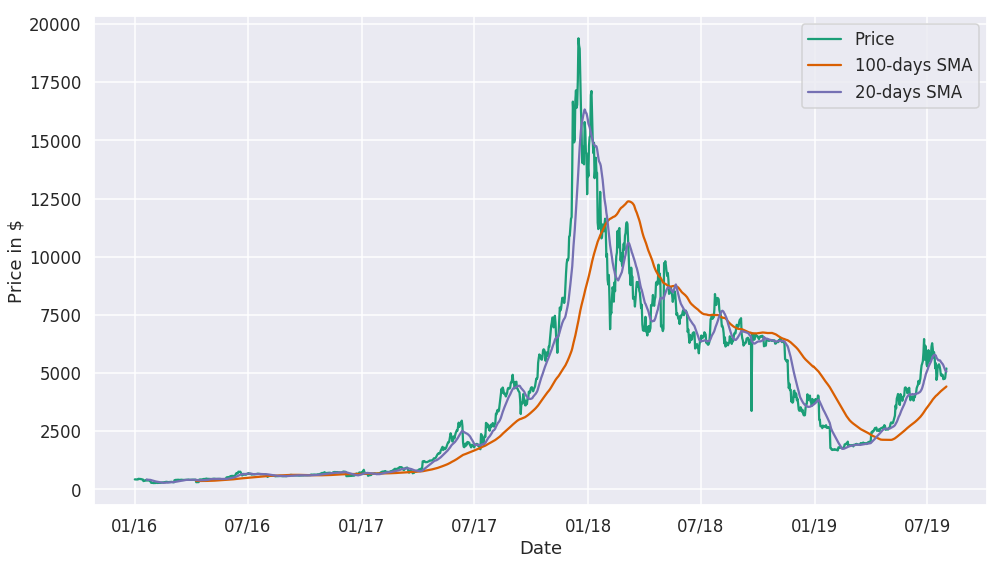

In [0]:
# Calculating the short-window simple moving average
short_rolling = close.rolling(window=20).mean()
# Calculating the long-window simple moving average
long_rolling = close.rolling(window=100).mean()
start_date = close.index.min()
end_date = close.index.max()

fig, ax = plt.subplots(figsize=(16,9))

ax.plot(close.loc[start_date:end_date, :].index, close.loc[start_date:end_date, 'BTC'], label='Price')
ax.plot(long_rolling.loc[start_date:end_date, :].index, long_rolling.loc[start_date:end_date, 'BTC'], label = '100-days SMA')
ax.plot(short_rolling.loc[start_date:end_date, :].index, short_rolling.loc[start_date:end_date, 'BTC'], label = '20-days SMA')

ax.legend(loc='best')
ax.set_xlabel('Date')
ax.set_ylabel('Price in $')
ax.xaxis.set_major_formatter(my_year_month_fmt)

### Using Pandas to calculate a 20-days span EMA (Exponential Moving Average)

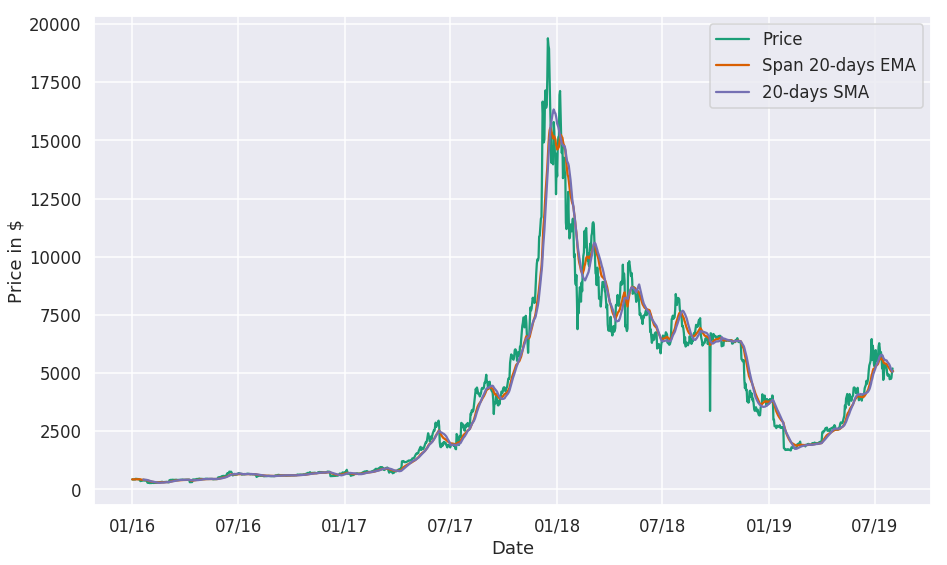

In [0]:
ema_short = close.ewm(span=20, adjust=False).mean()

fig, ax = plt.subplots(figsize=(15,9))

ax.plot(close.loc[start_date:end_date, :].index, close.loc[start_date:end_date, 'BTC'], label='Price')
ax.plot(ema_short.loc[start_date:end_date, :].index, ema_short.loc[start_date:end_date, 'BTC'], label = 'Span 20-days EMA')
ax.plot(short_rolling.loc[start_date:end_date, :].index, short_rolling.loc[start_date:end_date, 'BTC'], label = '20-days SMA')

ax.legend(loc='best')
ax.set_xlabel('Date')
ax.set_ylabel('Price in $')
ax.xaxis.set_major_formatter(my_year_month_fmt)

### A Moving Average Trading Strategy

- Let us attempt to use the moving averages calculated above to design a trading strategy for BITCOIN. Our first attempt is going to be relatively straghtforward and is going to take advantage of the fact that a moving average timeseries (whether SMA or EMA) lags the actual price behaviour.

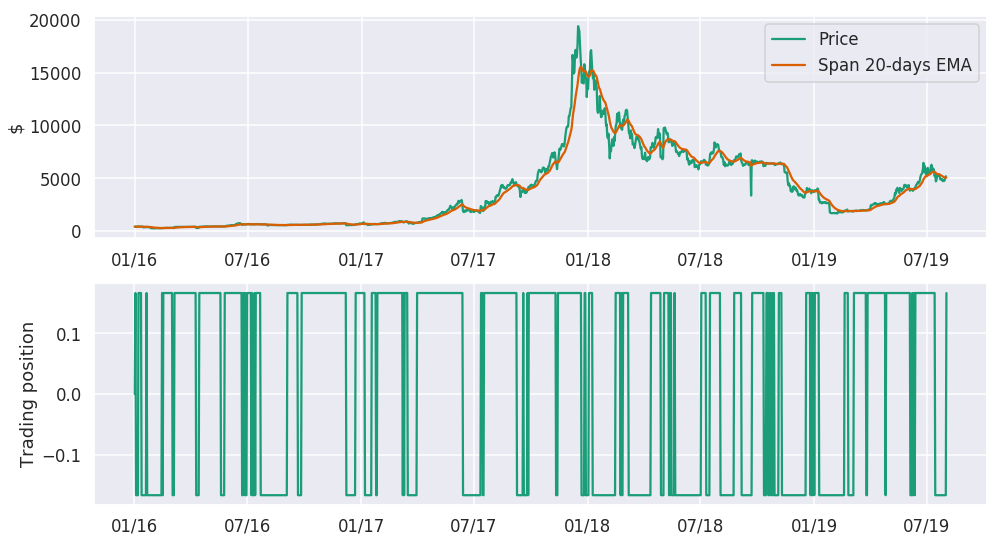

In [0]:
# Taking the difference between the prices and the EMA timeseries
trading_positions_raw = close - ema_short
# Taking the sign of the difference to determine whether the price or the EMA is greater and then multiplying by 1/6
trading_positions = trading_positions_raw.apply(np.sign) * 1/6
# Lagging our trading signals by one day.
trading_positions_final = trading_positions.shift(1)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,9))

ax1.plot(close.loc[start_date:end_date, :].index, close.loc[start_date:end_date, 'BTC'], label='Price')
ax1.plot(ema_short.loc[start_date:end_date, :].index, ema_short.loc[start_date:end_date, 'BTC'], label = 'Span 20-days EMA')

ax1.set_ylabel('$')
ax1.legend(loc='best')
ax1.xaxis.set_major_formatter(my_year_month_fmt)

ax2.plot(trading_positions_final.loc[start_date:end_date, :].index, trading_positions_final.loc[start_date:end_date, 'BTC'], 
        label='Trading position')

ax2.set_ylabel('Trading position')
ax2.xaxis.set_major_formatter(my_year_month_fmt)

### Now that the position our strategy dictates each day has been calculated, the performance of this strategy can be easily estimated.

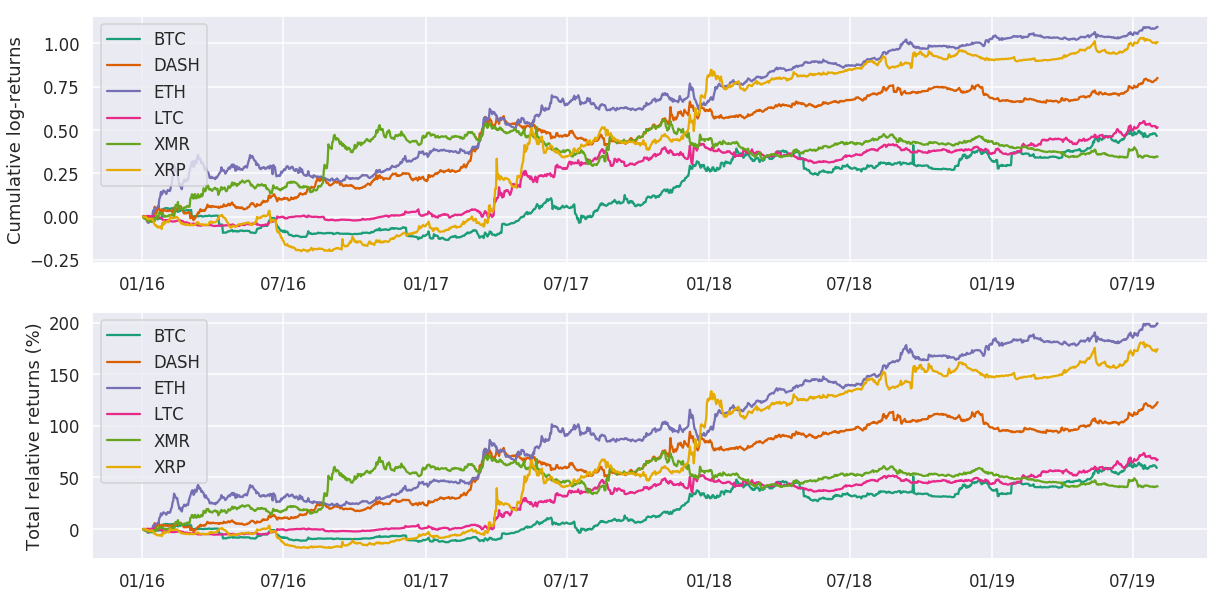

In [0]:
# Log returns - First the logarithm of the prices is taken and the the difference of consecutive (log) observations
asset_log_returns = np.log(close).diff()
strategy_asset_log_returns = trading_positions_final * asset_log_returns
strategy_asset_log_returns.tail()
# Get the cumulative log-returns per asset
cum_strategy_asset_log_returns = strategy_asset_log_returns.cumsum()

# Transform the cumulative log returns to relative returns
cum_strategy_asset_relative_returns = np.exp(cum_strategy_asset_log_returns) - 1

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20,10))

for c in asset_log_returns:
    ax1.plot(cum_strategy_asset_log_returns.index, cum_strategy_asset_log_returns[c], label=str(c))

ax1.set_ylabel('Cumulative log-returns')
ax1.legend(loc='best')
ax1.xaxis.set_major_formatter(my_year_month_fmt)

for c in asset_log_returns:
    ax2.plot(cum_strategy_asset_relative_returns.index, 100*cum_strategy_asset_relative_returns[c], label=str(c))

ax2.set_ylabel('Total relative returns (%)')
ax2.legend(loc='best')
ax2.xaxis.set_major_formatter(my_year_month_fmt)

### What is the Total Return of the Strategy?

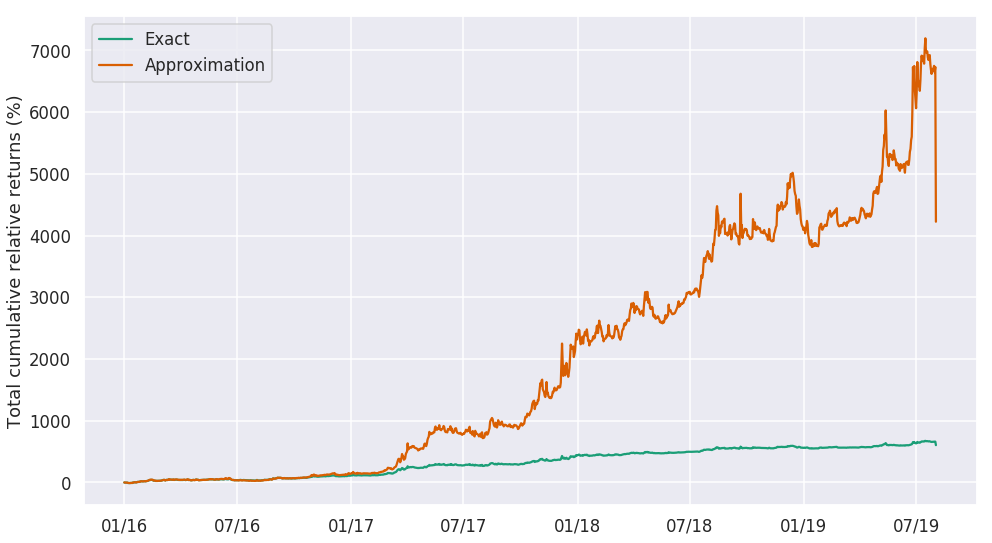

In [0]:
# Total strategy relative returns. This is the exact calculation.
cum_relative_return_exact = cum_strategy_asset_relative_returns.sum(axis=1)

# Get the cumulative log-returns per asset
cum_strategy_log_return = cum_strategy_asset_log_returns.sum(axis=1)

# Transform the cumulative log returns to relative returns. This is the approximation
cum_relative_return_approx = np.exp(cum_strategy_log_return) - 1

fig, ax = plt.subplots(figsize=(16,9))

ax.plot(cum_relative_return_exact.index, 100*cum_relative_return_exact, label='Exact')
ax.plot(cum_relative_return_approx.index, 100*cum_relative_return_approx, label='Approximation')

ax.set_ylabel('Total cumulative relative returns (%)')
ax.legend(loc='best')
ax.xaxis.set_major_formatter(my_year_month_fmt)

### The overall, yearly, performance of our strategy can be calculated again as:

In [0]:
def print_portfolio_yearly_statistics(portfolio_cumulative_relative_returns, days_per_year = 52 * 5):

    total_days_in_simulation = portfolio_cumulative_relative_returns.shape[0]
    number_of_years = total_days_in_simulation / days_per_year

    # The last data point will give us the total portfolio return
    total_portfolio_return = portfolio_cumulative_relative_returns[-1]
    # Average portfolio return assuming compunding of returns
    average_yearly_return = (1 + total_portfolio_return)**(1/number_of_years) - 1

    print('Total portfolio return is: ' + '{:5.2f}'.format(100*total_portfolio_return) + '%')
    print('Average yearly return is: ' + '{:5.2f}'.format(100*average_yearly_return) + '%')

print_portfolio_yearly_statistics(cum_relative_return_exact)

Total portfolio return is: 604.91%
Average yearly return is: 47.34%


### Let's compare it again with exponential moving average (EMA) strategy

Total portfolio return is: 104.43%
Average yearly return is: 15.25%


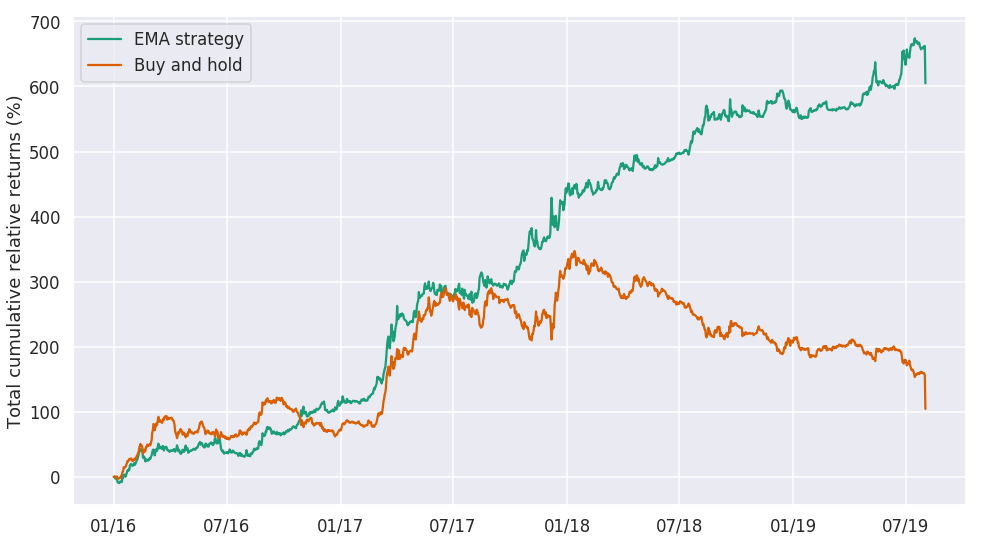

In [0]:
# Define the weights matrix for the simple buy-and-hold strategy
simple_weights_matrix = pd.DataFrame(1/6, index = close.index, columns=close.columns)

# Get the buy-and-hold strategy log returns per asset
simple_strategy_asset_log_returns = simple_weights_matrix * asset_log_returns

# Get the cumulative log-returns per asset
simple_cum_strategy_asset_log_returns = simple_strategy_asset_log_returns.cumsum()

# Transform the cumulative log returns to relative returns
simple_cum_strategy_asset_relative_returns = np.exp(simple_cum_strategy_asset_log_returns) - 1

# Total strategy relative returns. This is the exact calculation.
simple_cum_relative_return_exact = simple_cum_strategy_asset_relative_returns.sum(axis=1)

fig, ax = plt.subplots(figsize=(16,9))

ax.plot(cum_relative_return_exact.index, 100*cum_relative_return_exact, label='EMA strategy')
ax.plot(simple_cum_relative_return_exact.index, 100*simple_cum_relative_return_exact, label='Buy and hold')

ax.set_ylabel('Total cumulative relative returns (%)')
ax.legend(loc='best')
ax.xaxis.set_major_formatter(my_year_month_fmt)

print_portfolio_yearly_statistics(simple_cum_relative_return_exact)


#Feature engineering
De-trend and add a few extra features

In [0]:
basket=[]
basket=combine_df.ticker.unique().tolist()

In [0]:
X_scalers = {}
y_scalers = {}
for stock in basket:
    for col in ('close', 'high', 'low', 'open', 'volume'):
        combine_df[col] = combine_df[col].astype(float)
        combine_df.loc[combine_df['ticker'] == stock, col] = signal.detrend(combine_df[combine_df['ticker'] == stock][col])
        combine_df.loc[combine_df['ticker'] == stock, 'mean_close_price_2'] = combine_df.loc[combine_df['ticker'] == stock, 'close'].rolling(window=2).mean().fillna(value=0.00)
        combine_df.loc[combine_df['ticker'] == stock, 'mean_close_price_3'] = combine_df.loc[combine_df['ticker'] == stock, 'close'].rolling(window=3).mean().fillna(value=0.00)
        combine_df.loc[combine_df['ticker'] == stock, 'std_close_price_2'] = combine_df.loc[combine_df['ticker'] == stock, 'close'].rolling(window=2).std().fillna(value=0.00)
        combine_df.loc[combine_df['ticker'] == stock, 'std_close_price_3'] = combine_df.loc[combine_df['ticker'] == stock, 'close'].rolling(window=3).std().fillna(value=0.00)

In [0]:
X_scalers = {stock:{} for stock in basket}
y_scalers = {}

In [0]:
combine_df['tomo_gain'] = (combine_df['close'].shift(-1) - combine_df['close']).fillna(value=0.00)
combine_df['yday_gain'] = (combine_df['tomo_gain'].shift(1)).fillna(value=0.00)

In [0]:
as_date = combine_df.index
combine_df['dayofweek'] = as_date.dayofweek
combine_df['quarter'] = as_date.quarter
combine_df['weekofyear'] = as_date.weekofyear

In [0]:
combine_df=combine_df.dropna()

In [0]:
for stock in basket:
    combine_df = combine_df.drop(combine_df.index[len(combine_df[combine_df['ticker'] == stock]) - 1], axis=0)
    outliers = abs(combine_df[combine_df['ticker'] == stock]['tomo_gain']) < combine_df[combine_df['ticker'] == stock]['tomo_gain'].std() * 3
    combine_df[combine_df['ticker'] == stock] = combine_df[combine_df['ticker'] == stock].loc[:, :][outliers]
    combine_df = combine_df.drop(combine_df[combine_df['ticker'] == stock].iloc[-1].name) # get rid of last because next is a different stock
    pre_y = combine_df[combine_df['ticker'] == stock]['tomo_gain'].values
    y_scalers[stock] = make_pipeline(StandardScaler(), MinMaxScaler(feature_range=(-1, 1)))
    for col in ('close', 'high', 'low', 'open', 'volume', 'mean_close_price_2', \
               'mean_close_price_3', 'std_close_price_2', 'std_close_price_3', 'yday_gain'):
        pre_x = combine_df[combine_df['ticker'] == stock][col]
        X_scalers[stock][col] = make_pipeline(StandardScaler(), MinMaxScaler(feature_range=(-1, 1)))
        combine_df.loc[combine_df['ticker'] == stock, col] = X_scalers[stock][col].fit_transform(pre_x.values.reshape(-1,1))
    combine_df.loc[combine_df['ticker'] == stock, 'tomo_gain'] = y_scalers[stock].fit_transform(pre_y.reshape(-1, 1)).reshape(-1)

In [0]:
combine_df=combine_df.reset_index(drop=True)

#Recurrent neural network (RNN) - Trading Strategy

###Save the feature scalers

In [0]:
pickle.dump(X_scalers, open('x_scalers.pkl', 'wb'))
pickle.dump(y_scalers, open('y_scalers.pkl', 'wb'))

###Note same shape but now different scale

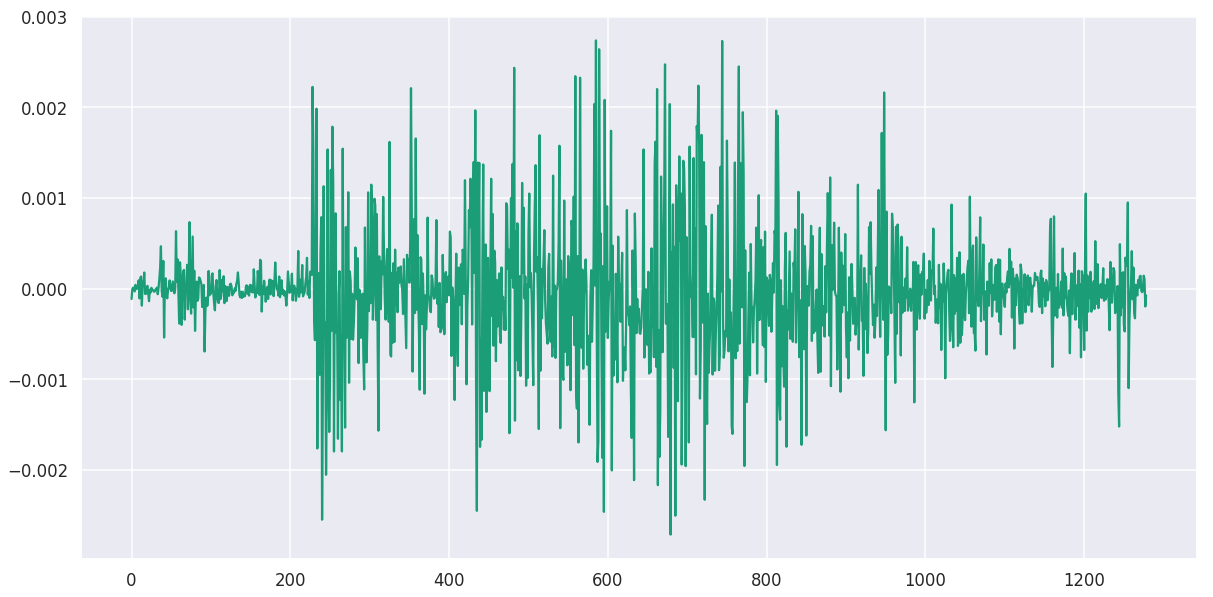

In [0]:
plt.figure(figsize=(20,10))
plt.plot(pre_y)
plt.show()

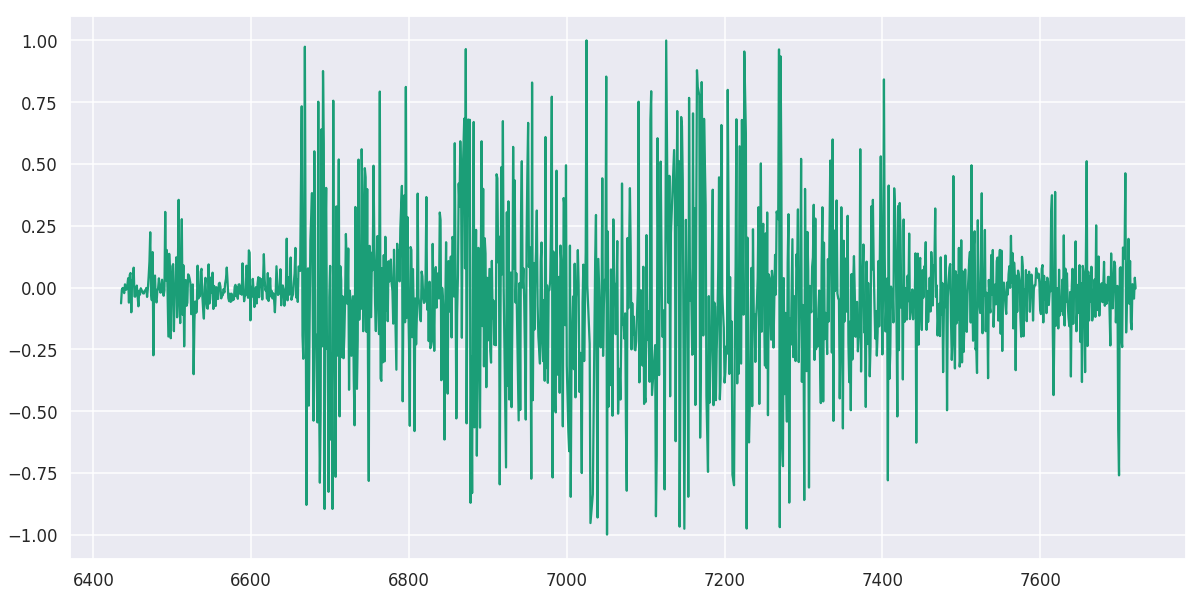

In [0]:
plt.figure(figsize=(20,10))
plt.plot( combine_df.loc[combine_df['ticker'] == basket[-1], 'tomo_gain'])
plt.show()

In [0]:
combine_df.shape

(7806, 16)

In [0]:
num_df_cols = combine_df.shape[1] - 1 + len(basket) - 1

In [0]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(num_df_cols, input_shape=(1, num_df_cols)))
model.add(tf.keras.layers.LSTM(64))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='sigmoid'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(32, activation='sigmoid'))
model.add(tf.keras.layers.Dense(1)) # dont squash output gradient

W0805 20:38:52.482607 140464340248448 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

In [0]:
X = combine_df.drop(['tomo_gain', 'ticker'], axis=1)
y = combine_df['tomo_gain']

In [0]:
dummies = pd.get_dummies(combine_df['ticker'], columns=['ticker'])

In [0]:
X = np.append(X, dummies.values, axis=1)

In [0]:
# Reshape to num_samples, timesteps, num_features
X = np.reshape(X, (-1, 1, num_df_cols))

###Back Testing

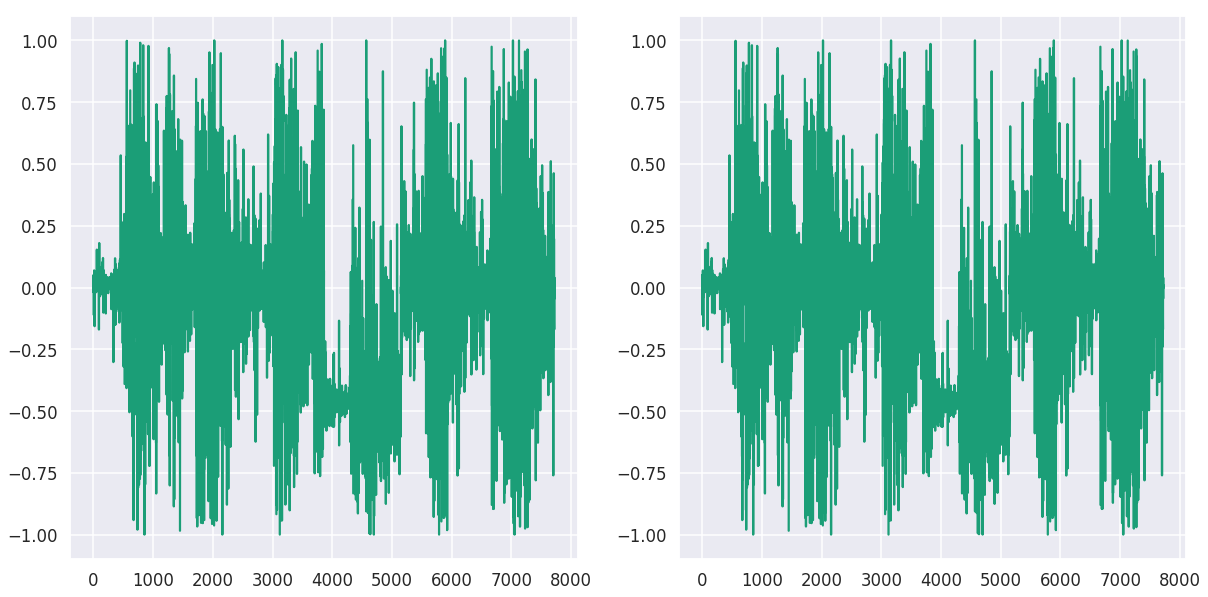

In [0]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(y)
plt.subplot(1,2,2)
plt.plot(combine_df['tomo_gain'].values)
plt.show()

### Fit the base model

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [0]:
X_train =  np.nan_to_num(X_train)
y_train =  np.nan_to_num(y_train)
X_test =  np.nan_to_num(X_test)
y_test =  np.nan_to_num(y_test)

In [0]:
model.fit(X_train, y_train.reshape(-1,1), batch_size=32, epochs=19)

W0805 20:39:14.088542 140464340248448 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/19
6244/6244 [==============================] - 3s 464us/sample - loss: 0.0781 - mean_squared_error: 0.0781
Epoch 2/19
6244/6244 [==============================] - 2s 268us/sample - loss: 0.0532 - mean_squared_error: 0.0532
Epoch 3/19
6244/6244 [==============================] - 2s 268us/sample - loss: 0.0492 - mean_squared_error: 0.0492
Epoch 4/19
6244/6244 [==============================] - 2s 263us/sample - loss: 0.0485 - mean_squared_error: 0.0485
Epoch 5/19
6244/6244 [==============================] - 2s 268us/sample - loss: 0.0480 - mean_squared_error: 0.0480
Epoch 6/19
6244/6244 [==============================] - 2s 265us/sample - loss: 0.0479 - mean_squared_error: 0.0479
Epoch 7/19
6244/6244 [==============================] - 2s 264us/sample - loss: 0.0479 - mean_squared_error: 0.0479
Epoch 8/19
6244/6244 [==============================] - 2s 267us/sample - loss: 0.0477 - mean_squared_error: 0.0477
Epoch 9/19
6244/6244 [==============================] - 2s 270us/sample 

In [0]:
model.evaluate(X_test, y_test)

1562/1562 [==============================] - 0s 181us/sample - loss: 0.0439 - mean_squared_error: 0.0439


[0.043871331521132234, 0.04387132]

### Back Testing

In [0]:
model.reset_states()

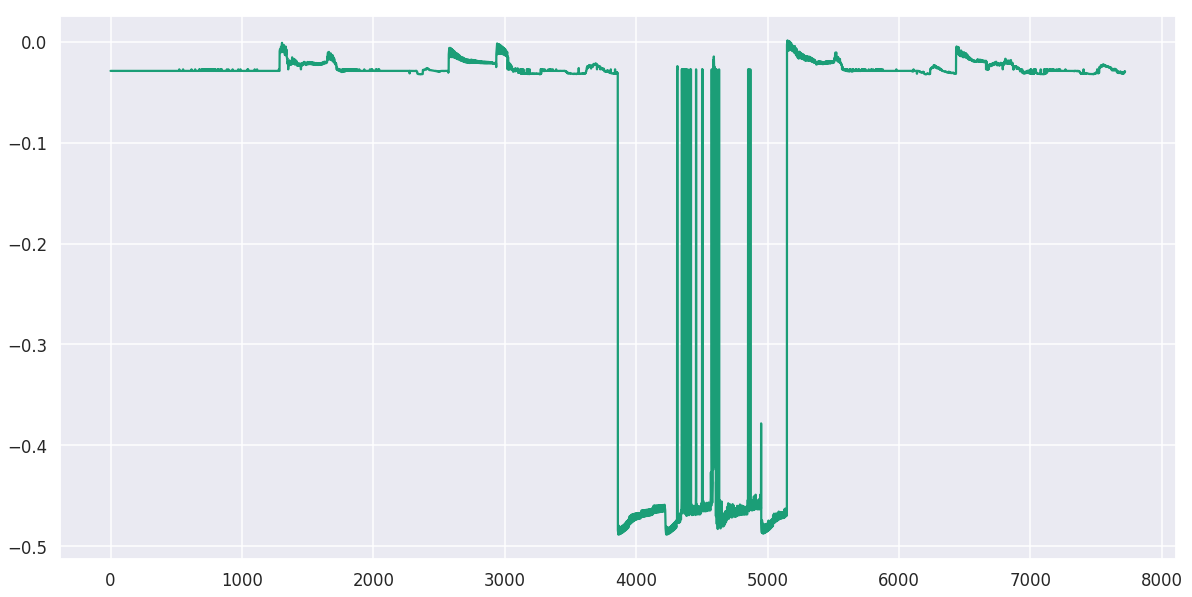

In [0]:
plt.figure(figsize=(20,10))
plt.plot(model.predict(X))
plt.show()

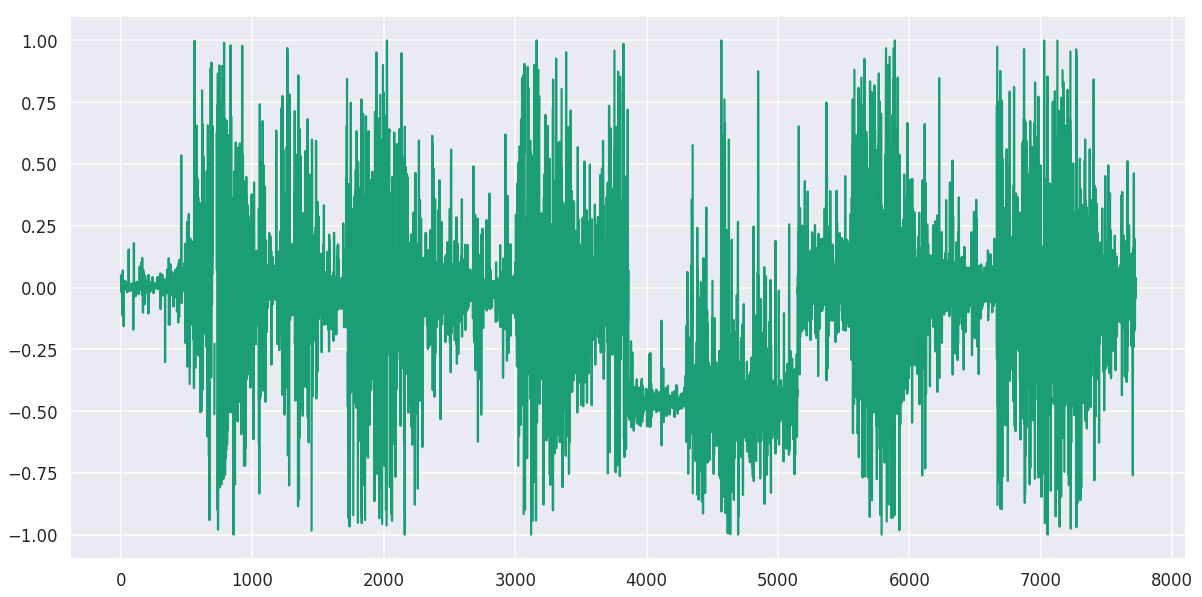

In [0]:
plt.figure(figsize=(20,10))
plt.plot(y)
plt.show()

###Pop off the model head and add a different one that we will finetune per stock

In [0]:
def pad_stock(symbol):
    dumdums = np.zeros(len(basket))
    dumdums[list(dummies.columns.values).index(symbol)] = 1.
    return dumdums

In [0]:
model.save('market_model.h5')

In [0]:
model.layers

In [0]:
model.pop()

In [0]:
# Freeze the 2 older dense layers
model.layers[0].trainable = False
model.layers[3].trainable = False

In [0]:
model.add(tf.keras.layers.Dense(128, activation='sigmoid'))
model.add(tf.keras.layers.Dense(1))

In [0]:
basket_dfs = {}
specific_models = {}
for stock in basket:
    basket_dfs[stock] = combine_df[combine_df['ticker'] == stock]
    specific_models[stock] = tf.keras.models.clone_model(model)
    specific_models[stock].set_weights(model.get_weights())

W0805 20:40:39.298288 140464340248448 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0805 20:40:39.300110 140464340248448 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0805 20:40:39.305820 140464340248448 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling Orthogonal.__init__ (from tensorflow.python.ops.init_ops) with dtype is de

In [0]:
for stock in basket:
    specific_models[stock].compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

In [0]:
Xes = {}
ys = {}
for stock in basket:
    repeated_dummies = pad_stock(stock).reshape(1,-1).repeat(len(basket_dfs[stock]),axis=0)
    Xes[stock] = np.append(basket_dfs[stock].drop(['tomo_gain', 'ticker'], axis=1).values, repeated_dummies, axis=1)
    Xes[stock] = np.reshape(Xes[stock], (-1, 1, num_df_cols))
    ys[stock] = basket_dfs[stock]['tomo_gain'].values.reshape(-1,1)

In [0]:
Xes_train, ys_train, Xes_test, ys_test, best_model_scores, best_model = {}, {}, {}, {}, {}, {}

In [0]:
for stock in basket:
    best_model_scores[stock] = 1e6
for stock in basket:
    Xes_train[stock] = Xes[stock][:-5]
    ys_train[stock] = ys[stock][:-5]
    Xes_test[stock] = Xes[stock][-5:]
    ys_test[stock] = ys[stock][-5:]
    for i in range(8):
        specific_models[stock].fit(Xes_train[stock], ys_train[stock], batch_size=32, epochs=25, verbose=0)
        specific_models[stock].fit(Xes_train[stock], ys_train[stock], batch_size=16, epochs=19, verbose=0)
        specific_models[stock].fit(Xes_train[stock], ys_train[stock], batch_size=1, epochs=1, verbose=0)
        evaluation = specific_models[stock].evaluate(Xes_test[stock], ys_test[stock])[0]
        if evaluation < best_model_scores[stock]:
            best_model_scores[stock] = evaluation
            print('now saving {} because it was the best with eval score {}'.format(stock, evaluation))
            best_model[stock] = tf.keras.models.clone_model(specific_models[stock])
            best_model[stock].set_weights(specific_models[stock].get_weights())
            best_model[stock].compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
        else:
            print('did not save {} because it did not improve with eval score {}'.format(stock, evaluation))

5/5 [==============================] - 0s 28ms/sample - loss: 0.0091 - mean_squared_error: 0.0091
now saving BTC because it was the best with eval score 0.009057638235390186
5/5 [==============================] - 0s 713us/sample - loss: 0.0200 - mean_squared_error: 0.0200
did not save BTC because it did not improve with eval score 0.019972316920757294
5/5 [==============================] - 0s 697us/sample - loss: 0.0075 - mean_squared_error: 0.0075
now saving BTC because it was the best with eval score 0.007497961632907391
5/5 [==============================] - 0s 773us/sample - loss: 0.0176 - mean_squared_error: 0.0176
did not save BTC because it did not improve with eval score 0.017614668235182762
5/5 [==============================] - 0s 689us/sample - loss: 0.0074 - mean_squared_error: 0.0074
now saving BTC because it was the best with eval score 0.007374742534011602
5/5 [==============================] - 0s 742us/sample - loss: 0.0085 - mean_squared_error: 0.0085
did not save BTC 

### Now let's reassign it for simplicity

In [0]:
for stock in basket:
    specific_models[stock] = best_model[stock]

### Back Testing

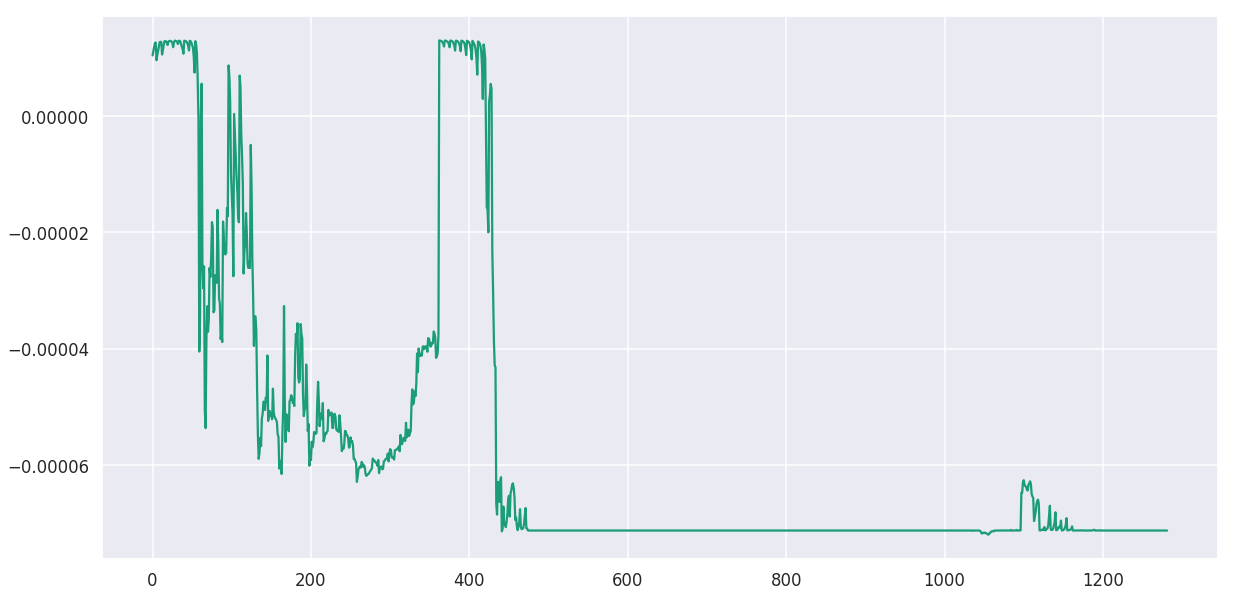

In [0]:
plt.figure(figsize=(20,10))
plt.plot(y_scalers['ETH'].inverse_transform(specific_models['ETH'].predict(Xes['ETH'])))
plt.show()

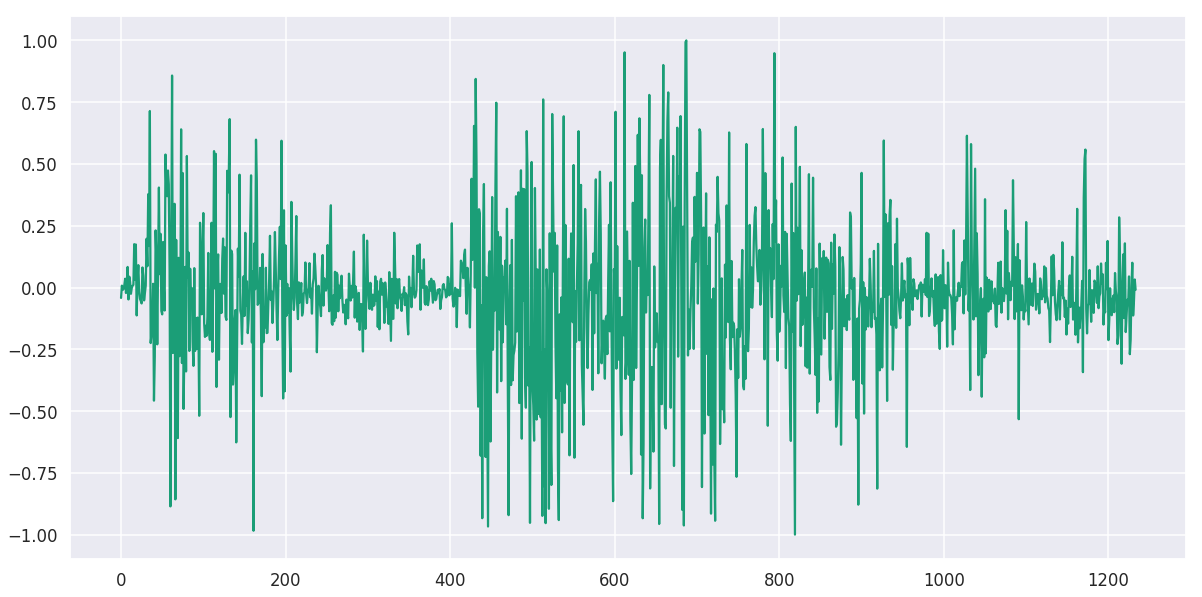

In [0]:
plt.figure(figsize=(20,10))
plt.plot(ys['ETH'])
plt.show()

##Make some predictions for tomorrow

I'm not sure if these have valid units by now, but definitely larger numbers mean higher gains, and v.v. Note that the RNN should be warmed up on a few previous days' data first; one-off predictions will not be as good so don't use it like this (see below instead).

In [0]:
for stock in basket:
    today = combine_df[combine_df['ticker'] == stock].iloc[-1].drop(['tomo_gain', 'ticker'])
    today = np.append(today, pad_stock(stock))
    specific_models[stock].reset_states()
    pred = specific_models[stock].predict(np.reshape(today, (-1, 1, num_df_cols)))
    pred = y_scalers[stock].inverse_transform(pred)
    print("Stock {}, pred: {}".format(stock, np.asscalar(pred)))

Stock BTC, pred: -20.389774322509766
Stock ETH, pred: -7.124771946109831e-05
Stock LTC, pred: -6.884678896312835e-06
Stock XRP, pred: 1.0338561651224154e-06
Stock DASH, pred: -8.919016545405611e-05
Stock XMR, pred: -1.3318614946911111e-05


### Save the fine tuned models

In [0]:
for stock, model in specific_models.items():
    model.save('finetuned_{}.h5'.format(stock))

##With the models built, run this to generate new predictions for the most recent day

In [0]:
X_scalers = pickle.load(open('x_scalers.pkl', 'rb'))
y_scalers = pickle.load(open('y_scalers.pkl', 'rb'))

In [0]:
new_day=pd.concat(currency_frames,sort=False)

In [0]:
for stock in basket:
    for col in ('close', 'high', 'low', 'open', 'volume'):
        new_day[col] = new_day[col].astype(float)
        new_day.loc[new_day['ticker'] == stock, col] = signal.detrend(new_day[new_day['ticker'] == stock][col])
        new_day.loc[new_day['ticker'] == stock, 'mean_close_price_2'] = new_day.loc[new_day['ticker'] == stock, 'close'].rolling(window=2).mean().fillna(value=0.00)
        new_day.loc[new_day['ticker'] == stock, 'mean_close_price_3'] = new_day.loc[new_day['ticker'] == stock, 'close'].rolling(window=3).mean().fillna(value=0.00)
        new_day.loc[new_day['ticker'] == stock, 'std_close_price_2'] = new_day.loc[new_day['ticker'] == stock, 'close'].rolling(window=2).std().fillna(value=0.00)
        new_day.loc[new_day['ticker'] == stock, 'std_close_price_3'] = new_day.loc[new_day['ticker'] == stock, 'close'].rolling(window=3).std().fillna(value=0.00)

In [0]:
new_day['tomo_gain'] = new_day['close'].shift(-1) - new_day['close']
new_day['yday_gain'] = new_day['tomo_gain'].shift(1)

In [0]:
new_day.head()

ticker        open  ...  tomo_gain  yday_gain
2016-01-01    BTC -214.237920  ...  -4.102156        NaN
2016-01-02    BTC -215.763089  ...  -9.448326  -4.102156
2016-01-03    BTC -221.333511  ...  -1.749793  -9.448326
2016-01-04    BTC -229.808931  ...  -5.541866  -1.749793
2016-01-05    BTC -232.376852  ...  -7.335828  -5.541866

[5 rows x 13 columns]

In [0]:
new_day.index.name = 'begins_at'
as_date = new_day.index
new_day['dayofweek'] = as_date.dayofweek
new_day['quarter'] = as_date.quarter
new_day['weekofyear'] = as_date.weekofyear
new_day = new_day.dropna(axis=0)
new_day = new_day.reset_index(drop=True)
for stock in basket:
    new_day = new_day.drop(new_day.index[len(new_day[new_day['ticker'] == stock]) - 1], axis=0)
    outliers = abs(new_day[new_day['ticker'] == stock]['tomo_gain']) < new_day[new_day['ticker'] == stock]['tomo_gain'].std() * 3
    new_day[new_day['ticker'] == stock] = new_day[new_day['ticker'] == stock].loc[:, :][outliers]
    new_day = new_day.drop(new_day[new_day['ticker'] == stock].iloc[-1].name)
    for col in ('close', 'high', 'low', 'open', 'volume', 'mean_close_price_2', \
               'mean_close_price_3', 'std_close_price_2', 'std_close_price_3', 'yday_gain'):
        pre_x = new_day[new_day['ticker'] == stock][col]
        new_day.loc[new_day['ticker'] == stock, col] = X_scalers[stock][col].transform(pre_x.values.reshape(-1,1))

In [0]:
new_day = new_day.dropna(axis=0)

In [0]:
dummies = pd.get_dummies(new_day['ticker'], columns=['ticker'])
num_df_cols = new_day.shape[1] - 1 + len(basket) - 1
def pad_stock(symbol):
    dumdums = np.zeros(len(basket))
    dumdums[list(dummies.columns.values).index(symbol)] = 1.
    return dumdums

### Today: This should be better

In [0]:
for stock in basket:
    today = new_day[new_day['ticker'] == stock].iloc[-8:-1].drop(['tomo_gain', 'ticker'], axis=1)
    today = np.append(today, pad_stock(stock).reshape(-1,6).repeat(7,axis=0))
    specific_models[stock].reset_states()
    pred = specific_models[stock].predict(np.reshape(today, (-1, 1, num_df_cols)))
    pred = y_scalers[stock].inverse_transform(pred)
    print("Stock {}, pred: {}".format(stock, np.asscalar(pred[-1])))

Stock BTC, pred: -20.39093017578125
Stock ETH, pred: -8.189764048438519e-05
Stock LTC, pred: -8.69905579747865e-06
Stock XRP, pred: -1.2667370356211904e-05
Stock DASH, pred: -9.140253678197041e-05
Stock XMR, pred: -2.9345412258408032e-05


#Deep Reinforcement Learning (Trading Strategy)

In [0]:
torch.manual_seed(51)

##Saperate Bitcoin and Alt Coin

In [0]:
btc_stock=combine_df_rl[combine_df_rl['ticker']=='BTC']
alt_stock=combine_df_rl[combine_df_rl['ticker']=='LTC']
btc_open = btc_stock["open"]
btc_close = btc_stock["close"]
alt_open = alt_stock["open"]
alt_close = alt_stock["close"]

##Examine the data

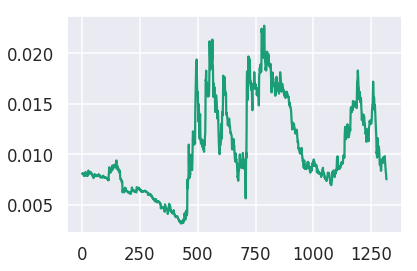

In [0]:
plt.plot(range(0,len(alt_open)), alt_open)

##Remove the general upwards trend.
Now I'm going to de-trend the data. Otherwise Bitcoin and Alt Coin are on completely different scales and we could hardly expect the AI to learn how to trade apples and oranges together. Additionally, we want the AI to learn the fundamentals of the stock signal - buy if it's going to rise. If we didn't remove the trend, maybe it'd only learn to buy at the start and hold til the end since a general upwards trend happens.

SciPy's signal processing module has a function that fits a linear least-squares model to the data and subtracts it for us.

In [0]:
alt_open = signal.detrend(alt_open)
alt_close = signal.detrend(alt_close)

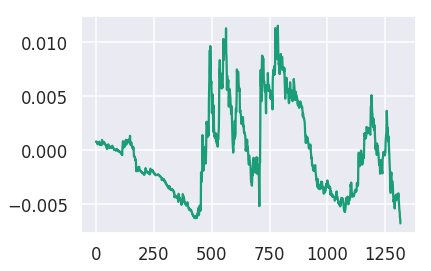

In [0]:
plt.plot(range(0,len(alt_close)), alt_close)

##Negative values?
It doesn't make sense to buy a share at a negative value. But since the model will learn to maximize reward, we can just shift it up by a constant number so it's always positive.

In [0]:
print(btc_open.min())
print(btc_close.min())
print(alt_open.min())
print(alt_close.min())

276.0125
275.855
-0.006334105416676756
-0.006760007171838335


###Choose 3306 


In [0]:
alt_open += 2.
alt_close += 2.

## Save the transformed data

In [0]:
with open("btcaltopenclose.pkl", "wb+") as f:
    pickle.dump({"bo":btc_open, "bc": btc_close, "ao": alt_open, "ac": alt_close}, f)

##If the data's already saved, skip the above and load it here instead

In [0]:
with open("btcaltopenclose.pkl", "rb") as f:
    d = pickle.load(f)
btc_open = d["bo"]
btc_close = d["bc"]
alt_open = d["ao"]
alt_close = d["ac"]

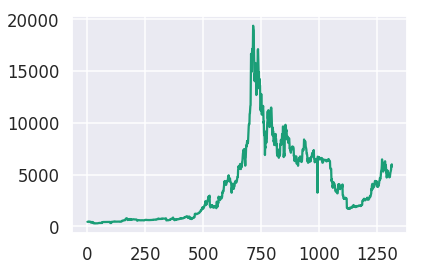

In [0]:
plt.plot(range(0,len(btc_open)), btc_open)

##Build the enviornment

In [0]:
class TradingEnvironment():

    def __init__(self, starting_cash_mean=200., max_stride=5, series_length=208, starting_point=1, randomize_cash_std=0, \
                 starting_shares_mean=0., randomize_shares_std=0., inaction_penalty=0.):
        self.starting_shares_mean = starting_shares_mean
        self.randomize_shares_std = randomize_shares_std
        self.starting_cash_mean = starting_cash_mean
        self.randomize_cash_std = randomize_cash_std
        
        self.state = torch.FloatTensor(torch.zeros(8)).cuda()
        
        self.starting_cash = max(int(np.random.normal(self.starting_cash_mean, self.randomize_cash_std)), 0.)
        
        self.series_length = series_length
        self.starting_point = starting_point
        self.cur_timestep = self.starting_point
        
        self.state[0] = max(int(np.random.normal(self.starting_shares_mean, self.randomize_shares_std)), 0.)
        self.state[1] = max(int(np.random.normal(self.starting_shares_mean, self.randomize_shares_std)), 0.)
        self.starting_portfolio_value = self.portfolio_value()
        self.state[2] = self.starting_cash
        self.state[3] = btc_open[self.cur_timestep]
        self.state[4] = alt_open[self.cur_timestep]
        self.state[5] = self.starting_portfolio_value
        self.state[6] = self.five_day_window()[0]
        self.state[7] = self.five_day_window()[1]
        
        self.max_stride = max_stride
        self.stride = self.max_stride # no longer varying it
        
        self.done = False
        self.diversification_bonus = 1.
        self.inaction_penalty = inaction_penalty
    
    def portfolio_value(self):
        return (self.state[0] * btc_close[self.cur_timestep]) + (self.state[1] * alt_close[self.cur_timestep]) + self.state[2]
    
    def next_opening_price(self):
        step = self.cur_timestep + self.stride
        return [btc_open[step], alt_open[step]]
    
    def five_day_window(self):
        step = self.cur_timestep
        if step < 5:
            return [btc_open[0], alt_open[0]]
        btc5 = btc_open[step-5:step].mean()
        alt5 = alt_open[step-5:step].mean()
        return [btc5, alt5]
    
    def step(self, action):
        action = [action, 1.]
        cur_timestep = self.cur_timestep
        ts_left = self.series_length - (cur_timestep - self.starting_point)
        retval = None
        cur_value = self.portfolio_value()
        gain = cur_value - self.starting_portfolio_value
        
        if cur_timestep >= self.starting_point + (self.series_length * self.stride):
            new_state = [self.state[0], self.state[1], self.state[2], *self.next_opening_price(), \
                        cur_value, *self.five_day_window()]
            self.state = new_state
            bonus = 0.
            if self.state[0] > 0 and self.state[1] > 0:
                bonus = self.diversification_bonus
            return new_state, cur_value + bonus + gain, True, { "msg": "done"}
        
        if action[0] == 2:
            new_state = [self.state[0], self.state[1], self.state[2], *self.next_opening_price(), \
                    cur_value, *self.five_day_window()]
            self.state = new_state
            retval = new_state, -self.inaction_penalty-ts_left +gain, False, { "msg": "nothing" }
            
        if action[0] == 0:
            if action[1] * btc_open[cur_timestep] > self.state[2]:
                new_state = [self.state[0], self.state[1], self.state[2], *self.next_opening_price(), \
                        cur_value, *self.five_day_window()]
                self.state = new_state
                retval = new_state, -ts_left+gain/2, True, { "msg": "bankrupted self"}
            else:
                btc_shares = self.state[0] + action[1]
                cash_spent = action[1] * btc_open[cur_timestep] * 1.1
                new_state = [btc_shares, self.state[1], self.state[2] - cash_spent, *self.next_opening_price(), \
                       cur_value, *self.five_day_window()]
                self.state = new_state
                retval = new_state, self.inaction_penalty-ts_left+gain, False, { "msg": "bought BTC"}
                
        if action[0] == 3:
            if action[1] * alt_open[cur_timestep] > self.state[2]:
                new_state = [self.state[0], self.state[1], self.state[2], *self.next_opening_price(), \
                        cur_value, *self.five_day_window()]
                self.state = new_state
                retval =  new_state, -ts_left+gain/2, True, { "msg": "bankrupted self"}
            else:
                alt_shares = self.state[1] + action[1]
                cash_spent = action[1] * alt_open[cur_timestep] * 1.1
                new_state = [self.state[0], alt_shares, self.state[2] - cash_spent, *self.next_opening_price(), \
                       cur_value, *self.five_day_window()]
                self.state = new_state
                retval = new_state, self.inaction_penalty-ts_left+gain, False, { "msg": "bought ALT"}
        

        if action[0] == 1:
            if action[1] > self.state[0]:
                new_state = [self.state[0], self.state[1], self.state[2], *self.next_opening_price(), \
                        cur_value, *self.five_day_window()]
                self.state = new_state
                retval = new_state, -ts_left+gain/2, True, { "msg": "sold more than have"}
            else:
                btc_shares = self.state[0] - action[1]
                cash_gained = action[1] * btc_open[cur_timestep] * 0.9
                new_state = [btc_shares, self.state[1], self.state[2] + cash_gained, *self.next_opening_price(), \
                       cur_value, *self.five_day_window()]
                self.state = new_state
                retval = new_state, self.inaction_penalty-ts_left+gain, False, { "msg": "sold BTC"}
                
        if action[0] == 4:
            if action[1] > self.state[1]:
                new_state = [self.state[0], self.state[1], self.state[2], *self.next_opening_price(), \
                        cur_value, *self.five_day_window()]
                self.state = new_state
                retval = new_state, -ts_left+gain/2, True, { "msg": "sold more than have"}
            else:
                alt_shares = self.state[1] - action[1]
                cash_gained = action[1] * alt_open[cur_timestep] * 0.9
                new_state = [self.state[0], alt_shares, self.state[2] + cash_gained, *self.next_opening_price(), \
                       cur_value, *self.five_day_window()]
                self.state = new_state
                retval = new_state, self.inaction_penalty-ts_left+gain, False, { "msg": "sold ALT"}
                
        self.cur_timestep += self.stride
        return retval
    
    def reset(self):
        self.state = torch.FloatTensor(torch.zeros(8)).cuda()
        self.starting_cash = max(int(np.random.normal(self.starting_cash_mean, self.randomize_cash_std)), 0.)
        self.cur_timestep = self.starting_point
        self.state[0] = max(int(np.random.normal(self.starting_shares_mean, self.randomize_shares_std)), 0.)
        self.state[1] = max(int(np.random.normal(self.starting_shares_mean, self.randomize_shares_std)), 0.)
        self.state[2] = self.starting_cash
        self.state[3] = btc_open[self.cur_timestep]
        self.state[4] = alt_open[self.cur_timestep]
        self.starting_portfolio_value = self.portfolio_value()
        self.state[5] = self.starting_portfolio_value
        self.state[6] = self.five_day_window()[0]
        self.state[7] = self.five_day_window()[1]       
        self.done = False
        return self.state

In [0]:
class Policy(nn.Module):
    def __init__(self):
        super(Policy, self).__init__()
        self.input_layer = nn.Linear(8, 128)
        self.hidden_1 = nn.Linear(128, 128)
        self.hidden_2 = nn.Linear(32,31)
        self.hidden_state = torch.tensor(torch.zeros(2,1,32)).cuda()
        self.rnn = nn.GRU(128, 32, 2)
        self.action_head = nn.Linear(31, 5)
        self.value_head = nn.Linear(31, 1)
        self.saved_actions = []
        self.rewards = []

    def reset_hidden(self):
        self.hidden_state = torch.tensor(torch.zeros(2,1,32)).cuda()
        
    def forward(self, x):
        x = torch.tensor(x).cuda()
        x = torch.sigmoid(self.input_layer(x))
        x = torch.tanh(self.hidden_1(x))
        x, self.hidden_state = self.rnn(x.view(1,-1,128), self.hidden_state.data)
        x = F.relu(self.hidden_2(x.squeeze()))
        action_scores = self.action_head(x)
        state_values = self.value_head(x)
        return F.softmax(action_scores, dim=-1), state_values
    
    def act(self, state):
        probs, state_value = self.forward(state)
        m = Categorical(probs)
        action = m.sample()
        if action == 1 and env.state[0] < 1: action = torch.LongTensor([2]).squeeze().cuda()
        if action == 4 and env.state[1] < 1: action = torch.LongTensor([2]).squeeze().cuda()
        self.saved_actions.append((m.log_prob(action), state_value))
        return action.item()

In [0]:
import torch.optim as optim
env = TradingEnvironment(max_stride=4, series_length=250, starting_cash_mean=1000, randomize_cash_std=100, starting_shares_mean=100, randomize_shares_std=10)
model = Policy().cuda()
optimizer = optim.Adam(model.parameters(), lr=3e-4)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



In [0]:
from torch.distributions import Categorical
env.reset()
# In case you're running this a second time with the same model, delete the gradients
del model.rewards[:]
del model.saved_actions[:]

gamma = 0.9
log_interval = 60

def finish_episode():
    R = 0
    saved_actions = model.saved_actions
    policy_losses = []
    value_losses = []
    rewards = []
    for r in model.rewards[::-1]:
        R = r + (gamma * R)
        rewards.insert(0, R)
    rewards = torch.tensor(rewards)
    
    epsilon = (torch.rand(1) / 1e4) - 5e-5
    # With different architectures, I found the following standardization step sometimes
    # helpful, sometimes unhelpful.
    # rewards = (rewards - rewards.mean()) / (rewards.std(unbiased=False) + epsilon)
    # Alternatively, comment it out and use the following line instead:
    rewards += epsilon
    
    for (log_prob, value), r in zip(saved_actions, rewards):
        reward = torch.tensor(r - value.item()).cuda()
        policy_losses.append(-log_prob * reward)
        value_losses.append(F.smooth_l1_loss(value, torch.tensor([r]).cuda()))
        
    optimizer.zero_grad()
    loss = torch.stack(policy_losses).sum() + torch.stack(value_losses).sum()
    loss = torch.clamp(loss, -1e-5, 1e5)
    loss.backward()
    optimizer.step()
    del model.rewards[:]
    del model.saved_actions[:]

running_reward = 0
for episode in range(0, 4000):
    state = env.reset()
    reward = 0
    done = False
    msg = None
    while not done:
        action = model.act(state)
        state, reward, done, msg = env.step(action)
        model.rewards.append(reward)
        if done:
            break
    running_reward = running_reward * (1 - 1/log_interval) + reward * (1/log_interval)
    finish_episode()
    # Resetting the hidden state seems unnecessary - it's effectively random from the previous
    # episode anyway, more random than a bunch of zeros.
    # model.reset_hidden()
    if msg["msg"] == "done" and env.portfolio_value() > env.starting_portfolio_value * 1.1 and running_reward > 500:
        print("Early Stopping: " + str(int(reward)))
        break
    if episode % log_interval == 0:
        print("""Episode {}: started at {:.1f}, finished at {:.1f} because {} @ t={}, \
last reward {:.1f}, running reward {:.1f}""".format(episode, env.starting_portfolio_value, \
              env.portfolio_value(), msg["msg"], env.cur_timestep, reward, running_reward))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



Episode 0: started at 44050.6, finished at 39226.0 because bankrupted self @ t=17, last reward -473.3, running reward -7.9
Episode 60: started at 49537.9, finished at 49563.1 because bankrupted self @ t=141, last reward 486.2, running reward 1329.9
Episode 120: started at 42937.3, finished at 27372.2 because bankrupted self @ t=33, last reward -7701.0, running reward 14257.1
Episode 180: started at 40320.7, finished at 29444.3 because bankrupted self @ t=49, last reward -6368.0, running reward 20403.3
Episode 240: started at 44943.5, finished at 187411.9 because bankrupted self @ t=533, last reward 74036.3, running reward 29201.8
Early Stopping: 845989


##Let's see how it does in practice, on the training data

In [0]:
env = TradingEnvironment(max_stride=4, series_length=250, starting_cash_mean=1000, randomize_cash_std=100, starting_shares_mean=100, randomize_shares_std=25)

total_rewards = 0
total_profits = 0
failed_goes = 0
num_goes = 10

for j in range(num_goes):
    env.reset()
    reward_this_go = -1e8
    for i in range(0,env.series_length + 1):
        action = model.act(env.state)
        next_state, reward, done, msg = env.step(action)
        if msg["msg"] == "done":
            reward_this_go = env.portfolio_value()
            break
        if done:
            break
    total_profits += (env.portfolio_value() - env.starting_portfolio_value) / env.starting_portfolio_value
    if reward_this_go == -1e8:
        failed_goes += 1
    else:
        total_rewards += reward_this_go

if failed_goes == num_goes:
    print("Failed all")
else:
    print("Failed goes: {} / {}, Avg Rewards per successful game: {}".format(failed_goes, num_goes, total_rewards / (num_goes - failed_goes)))
    print("Avg % profit per game: {}".format(total_profits / num_goes))
    print("Avg % profit per finished game: {}".format(total_profits / (num_goes - failed_goes)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



Failed goes: 9 / 10, Avg Rewards per successful game: 321960.6875
Avg % profit per game: 2.2017509937286377
Avg % profit per finished game: 22.01750946044922


##And here's how a sample trading run might look

In [0]:
env = TradingEnvironment(max_stride=4, series_length=250, starting_cash_mean=1000, randomize_cash_std=100, starting_shares_mean=100, randomize_shares_std=10)
env.reset()
print("starting portfolio value {}".format(env.portfolio_value()))
for i in range(0,env.series_length + 1):
    action = model.act(env.state)
    next_state, reward, done, msg = env.step(action)
    if msg["msg"] == 'bankrupted self':
        print('bankrupted self by 1')
        break
    if msg["msg"] == 'sold more than have':
        print('sold more than have by 1')
        break
    print("{}, have {} BTC and {} ALT and {} cash".format(msg["msg"], next_state[0], next_state[1], next_state[2]))
    if msg["msg"] == "done":
        print(next_state, reward)
        print("total portfolio value {}".format(env.portfolio_value()))
        break

starting portfolio value 46409.83984375
sold BTC, have 103.0 BTC and 102.0 ALT and 1415.23681640625 cash
bought ALT, have 103.0 BTC and 103.0 ALT and 1413.0360107421875 cash
sold ALT, have 103.0 BTC and 102.0 ALT and 1414.8365478515625 cash
bought ALT, have 103.0 BTC and 103.0 ALT and 1412.6357421875 cash
sold BTC, have 102.0 BTC and 103.0 ALT and 1755.05224609375 cash
nothing, have 102.0 BTC and 103.0 ALT and 1755.05224609375 cash
bought ALT, have 102.0 BTC and 104.0 ALT and 1752.8516845703125 cash
bought BTC, have 103.0 BTC and 104.0 ALT and 1440.6138916015625 cash
bought BTC, have 104.0 BTC and 104.0 ALT and 1132.8944091796875 cash
sold ALT, have 104.0 BTC and 103.0 ALT and 1134.695068359375 cash
bought BTC, have 105.0 BTC and 103.0 ALT and 822.3253173828125 cash
sold BTC, have 104.0 BTC and 103.0 ALT and 1096.256103515625 cash
sold ALT, have 104.0 BTC and 102.0 ALT and 1098.0562744140625 cash
nothing, have 104.0 BTC and 102.0 ALT and 1098.0562744140625 cash
bought ALT, have 104.0 B

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



nothing, have 95.0 BTC and 105.0 ALT and 4851.53125 cash
sold BTC, have 94.0 BTC and 105.0 ALT and 5442.05712890625 cash
sold ALT, have 94.0 BTC and 104.0 ALT and 5443.85546875 cash
sold BTC, have 93.0 BTC and 104.0 ALT and 5968.134765625 cash
bought BTC, have 94.0 BTC and 104.0 ALT and 5316.736328125 cash
sold ALT, have 94.0 BTC and 103.0 ALT and 5318.53466796875 cash
bought ALT, have 94.0 BTC and 104.0 ALT and 5316.3369140625 cash
bought ALT, have 94.0 BTC and 105.0 ALT and 5314.13916015625 cash
nothing, have 94.0 BTC and 105.0 ALT and 5314.13916015625 cash
sold BTC, have 93.0 BTC and 105.0 ALT and 5832.11181640625 cash
bought ALT, have 93.0 BTC and 106.0 ALT and 5829.91357421875 cash
nothing, have 93.0 BTC and 106.0 ALT and 5829.91357421875 cash
sold ALT, have 93.0 BTC and 105.0 ALT and 5831.71142578125 cash
sold ALT, have 93.0 BTC and 104.0 ALT and 5833.50927734375 cash
sold BTC, have 92.0 BTC and 104.0 ALT and 6379.48291015625 cash
sold ALT, have 92.0 BTC and 103.0 ALT and 6381.28

In [0]:
btc_open_orig = btc_stock["open"]
btc_close_orig = btc_stock["close"]
alt_open_orig = alt_stock["open"]
alt_close_orig = alt_stock["close"]

In [0]:
env = TradingEnvironment(max_stride=4, series_length=250, starting_cash_mean=1000, randomize_cash_std=100, starting_shares_mean=100, randomize_shares_std=25)
env.reset()
complete_game = False
while not complete_game:
    bought_btc_at = []
    bought_alt_at = []
    sold_btc_at = []
    sold_alt_at = []
    bought_btc_at_orig = []
    bought_alt_at_orig = []
    sold_btc_at_orig = []
    sold_alt_at_orig = []
    nothing_at = []
    ba_action_times = []
    bm_action_times = []
    sa_action_times = []
    sm_action_times = []
    n_action_times = []
    starting_val = env.starting_portfolio_value
    print("Starting portfolio value: {}".format(starting_val))
    for i in range(0,env.series_length + 1):
        action = model.act(env.state)
        if action == 0:
            bought_btc_at.append(btc_open[env.cur_timestep])
            bought_btc_at_orig.append(btc_open_orig[env.cur_timestep])
            ba_action_times.append(env.cur_timestep)
        if action == 1:
            sold_btc_at.append(btc_close[env.cur_timestep])
            sold_btc_at_orig.append(btc_close_orig[env.cur_timestep])
            sa_action_times.append(env.cur_timestep)
        if action == 2:
            nothing_at.append(35)
            n_action_times.append(env.cur_timestep)
        if action == 3:
            bought_alt_at.append(alt_open[env.cur_timestep])
            bought_alt_at_orig.append(btc_open_orig[env.cur_timestep])
            bm_action_times.append(env.cur_timestep)
        if action == 4:
            sold_alt_at.append(alt_close[env.cur_timestep])
            sold_alt_at_orig.append(btc_close_orig[env.cur_timestep])
            sm_action_times.append(env.cur_timestep)
        next_state, reward, done, msg = env.step(action)
        if msg["msg"] == 'bankrupted self':
            env.reset()
            break
        if msg["msg"] == 'sold more than have':
            env.reset()
            break
        if msg["msg"] == "done":
            print("{}, have {} BTC and {} ALT and {} cash".format(msg["msg"], next_state[0], next_state[1], next_state[2]))
            val = env.portfolio_value()
            print("Finished portfolio value {}".format(val))
            if val > starting_val * 1.1: complete_game = True
            env.reset()
            break

Starting portfolio value: 51310.6875


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



Starting portfolio value: 59002.59375
Starting portfolio value: 42623.8984375
Starting portfolio value: 41592.98828125
Starting portfolio value: 57318.84375
Starting portfolio value: 62830.59375
Starting portfolio value: 31917.31640625
Starting portfolio value: 31664.869140625
done, have 43.0 BTC and 73.0 ALT and 96334.8046875 cash
Finished portfolio value 381096.625


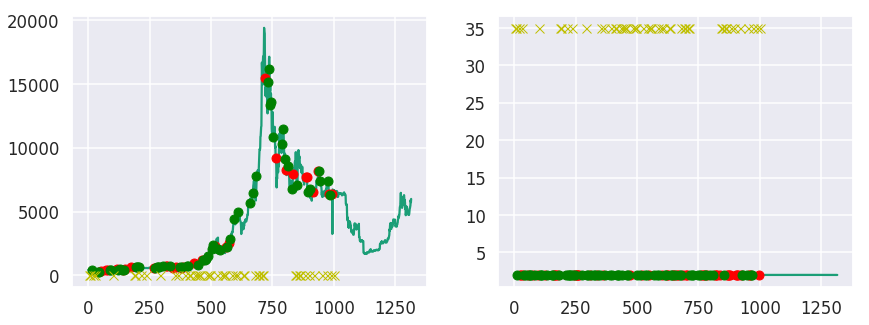

In [0]:
plt.figure(1, figsize=(14,5))
btc = plt.subplot(121)
alt = plt.subplot(122)
btc.plot(range(0, len(btc_open)), btc_open)
alt.plot(range(0, len(alt_open)), alt_open)
btc.plot(ba_action_times, bought_btc_at, "ro")
btc.plot(sa_action_times, sold_btc_at, "go")
btc.plot(n_action_times, nothing_at, "yx")
alt.plot(n_action_times, nothing_at, "yx")
alt.plot(bm_action_times, bought_alt_at, "ro")
alt.plot(sm_action_times, sold_alt_at, "go")

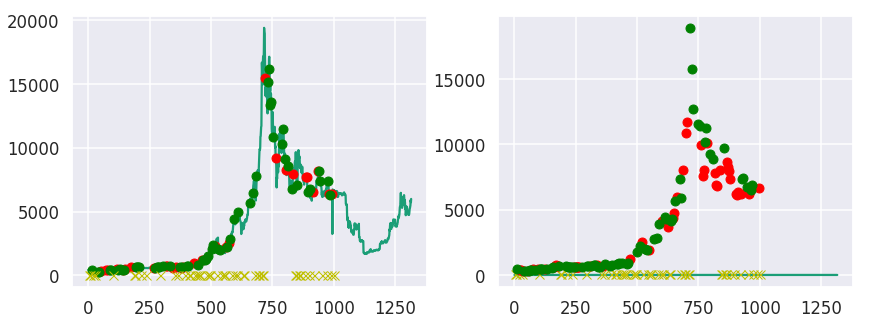

In [0]:
plt.figure(1, figsize=(14,5))
btc = plt.subplot(121)
alt = plt.subplot(122)
btc.plot(range(0, len(btc_open_orig)), btc_open_orig)
alt.plot(range(0, len(alt_open_orig)), alt_open_orig)
btc.plot(ba_action_times, bought_btc_at_orig, "ro")
btc.plot(sa_action_times, sold_btc_at_orig, "go")
btc.plot(n_action_times, nothing_at, "yx")
alt.plot(n_action_times, nothing_at, "yx")
alt.plot(bm_action_times, bought_alt_at_orig, "ro")
alt.plot(sm_action_times, sold_alt_at_orig, "go")

# Next Steps


- Add data from more cryptocurrencies to the analysis.

- Adjust the time frame and granularity of the correlation analysis, for a more fine or coarse grained view of the trends.

- Search for trends in trading volume and/or blockchain mining data sets. The buy/sell volume ratios are likely more relevant than the raw price data if you want to predict future price fluctuations.

- Add pricing data on stocks, commodities, and fiat currencies to determine which of them correlate with cryptocurrencies (but please remember the old adage that "Correlation does not imply causation").

- Quantify the amount of "buzz" surrounding specific cryptocurrencies using Event Registry, GDLELT, and Google Trends.

- Use your analysis to create an automated "Trading Bot" on a trading site such as Poloniex or Coinbase, using their respective trading APIs. 

- Be careful: a poorly optimized trading bot is an easy way to lose your money quickly.
